# Importing Libraries

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import re
from random import randrange
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
# from neuralprophet import NeuralProphet
import warnings
import pmdarima as pm
from datetime import datetime
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from time import time
import seaborn as sns
import statsmodels.api as sm

 # Phase 2: Provisioning

Following the analysis of the sensors provided, this phase will evaluate the dataset itself to see the general categorization, outliers, upper and lower limits, and so on.

## 1.Importing Dataset

Using glob we scan the directory of a local folder, getting all files in the process. Using regex we filter out any file type that isn't .csv. We name all files apropriately, read the file and cast them to the appropriate variables. 

In [14]:
## Find all .csv in specified directory
# directory path
dir = r"project_datasets\\"
# glob finds and puts all the file paths into a list
all_files = glob.glob(dir + "*.csv")

In [15]:
## Using RegEx take the name and format it (Format => "df_A")
pattern = re.compile(r'(?<=\\)(.*?)(?=\.)')
def get_file_names(x):
    files = x
    saved = []
    for file in files:
        for name in re.findall(pattern, file):
            name = name.replace("data","df")
            ## .lower() could be removed it's just that our existing document uses lower case (df_a, df_d)
            name = name.lower()
            saved.append(name)
    return saved

In [16]:
## Read all the file name and paths and assign them to variable
dataframe_names = get_file_names(all_files)
for index, item in enumerate(dataframe_names):
    globals()['%s' % item] = pd.read_csv(all_files[index])

In [17]:
print("Available Dataframes:")
print(dataframe_names)

Available Dataframes:
['df_a', 'df_aa', 'df_ab', 'df_ac', 'df_ad', 'df_b', 'df_c', 'df_d', 'df_e', 'df_f', 'df_g', 'df_h', 'df_i', 'df_j', 'df_k', 'df_m', 'df_n', 'df_o', 'df_p', 'df_q', 'df_r', 'df_s', 'df_t', 'df_u', 'df_v', 'df_w', 'df_x', 'df_y', 'df_z']


Throughout this procedure, all of the available devices in this dataset can be seen; there are quite a number; nevertheless, before diving deeper into the content, it is necessary to approach necessary datatypes.

## 2.Converting our dataframes to Time Series

We convert the EventDt column in each avaiable dataframe to DateTime format, after which we set it as an index and then we resmaple the data on a 5 minute frequency.
Addtionally we add a daily, weekly and monthly variant of each dataframe that assist us in the data analysis at a later point in this notebook.

In [18]:
## Convert all column types to date_time and transform dataframes to time-series
for item in dataframe_names:
    globals()['%s' % item]["EventDt"] = pd.to_datetime(globals()['%s' % item]["EventDt"])
    globals()['%s' % item] = globals()['%s' % item].set_index(globals()['%s' % item]["EventDt"])
    globals()['%s' % item] = globals()['%s' % item].resample(rule="5T").mean()

In [19]:
df_a.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 315647 entries, 2018-11-18 16:10:00 to 2021-11-18 16:00:00
Freq: 5T
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Temp    258390 non-null  float64
dtypes: float64(1)
memory usage: 4.8 MB


In [20]:
## Added additional dataframes with resampled data in different formats (daily, weekly, monthly)
for item in dataframe_names:
    globals()['%s_daily' % item] = globals()['%s' % item].resample(rule="D").mean()
    globals()['%s_weekly' % item] = globals()['%s' % item].resample(rule="W").mean()
    globals()['%s_monthly' % item] = globals()['%s' % item].resample(rule="M").mean()

## 3. Visualisation 

Before we went any farther with our research, we wanted to see what each gadget was doing and if it was being read correctly.

In [9]:
#pic size
#sns.set(rc={'figure.figsize':(11.7,8.27)})
#fix the date and maybe zoom in or smt
#fig, ax = plt.subplots()
#sns.lineplot(x='EventDt', y='Temp', data=df_a, ax=ax) #first dataset
#sns.lineplot(x='EventDt', y='Temp', data=df_aa, ax=ax)
#sns.lineplot(x='EventDt', y='Temp', data=df_ab, ax=ax)
#sns.lineplot(x='EventDt', y='Temp', data=df_ac, ax=ax)
#sns.lineplot(x='EventDt', y='Temp', data=df_ad, ax=ax)
#sns.lineplot(x='EventDt', y='Temp', data=df_b, ax=ax)
#sns.lineplot(x='EventDt', y='Temp', data=df_c, ax=ax)
#sns.lineplot(x='EventDt', y='Temp', data=df_d, ax=ax)
#sns.lineplot(x='EventDt', y='Temp', data=df_e, ax=ax)
#sns.lineplot(x='EventDt', y='Temp', data=df_f, ax=ax)
#sns.lineplot(x='EventDt', y='Temp', data=df_g, ax=ax)
#sns.lineplot(x='EventDt', y='Temp', data=df_h, ax=ax)
#sns.lineplot(x='EventDt', y='Temp', data=df_i, ax=ax)
#sns.lineplot(x='EventDt', y='Temp', data=df_j, ax=ax)
#sns.lineplot(x='EventDt', y='Temp', data=df_k, ax=ax)
#sns.lineplot(x='EventDt', y='Temp', data=df_m, ax=ax)
#sns.lineplot(x='EventDt', y='Temp', data=df_n, ax=ax)
#sns.lineplot(x='EventDt', y='Temp', data=df_o, ax=ax)
#sns.lineplot(x='EventDt', y='Temp', data=df_p, ax=ax)
#sns.lineplot(x='EventDt', y='Temp', data=df_q, ax=ax)
#sns.lineplot(x='EventDt', y='Temp', data=df_r, ax=ax)
#sns.lineplot(x='EventDt', y='Temp', data=df_s, ax=ax)
#sns.lineplot(x='EventDt', y='Temp', data=df_t, ax=ax)
#sns.lineplot(x='EventDt', y='Temp', data=df_u, ax=ax)
#sns.lineplot(x='EventDt', y='Temp', data=df_v, ax=ax)
#sns.lineplot(x='EventDt', y='Temp', data=df_w, ax=ax)
#sns.lineplot(x='EventDt', y='Temp', data=df_x, ax=ax)
#sns.lineplot(x='EventDt', y='Temp', data=df_y, ax=ax)
#sns.lineplot(x='EventDt', y='Temp', data=df_z, ax=ax)
#plt.title("Linear graph")

As can be observed, the representation of each sensor is a jumble, making it difficult to understand what is going on within. To approach the analysis through this research, we will first compile average temperatures for each device to evaluate where they stand from freezing to warming.

## 4.Average Temperature Dictionary

To cut-down on load times, instead of plotting each dataframe values directly, we create a dictionary with the names and average temperature for each of our devices. Said dictionary is later plotted using SeaBorn barplot.

In [21]:
average_temps = []
for item in dataframe_names:
#     mean_temp = globals()['%s' % item]["Temp"].mean()
    mean_temp = globals()['%s' % item]["Temp"].quantile(.35)
    average_temps.append(mean_temp)
    
mean_temp_dev_dictionary = {"Device":dataframe_names,"Mean Temperature":average_temps}
mean_temp_dev = pd.DataFrame.from_dict(mean_temp_dev_dictionary)
mean_temp_dev.T

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
Device,df_a,df_aa,df_ab,df_ac,df_ad,df_b,df_c,df_d,df_e,df_f,...,df_q,df_r,df_s,df_t,df_u,df_v,df_w,df_x,df_y,df_z
Mean Temperature,17.33,-21.0,18.83,21.87,19.41,5.55,14.15,16.84,-24.13,21.75,...,18.89,4.53,0.96,13.0,19.53,4.14,6.36,5.19,-21.1,5.54


We opted to approach it through visuals from the coldest to the warmest temperature per device to see where each of the standing and categorize it after the average temperature conversion.

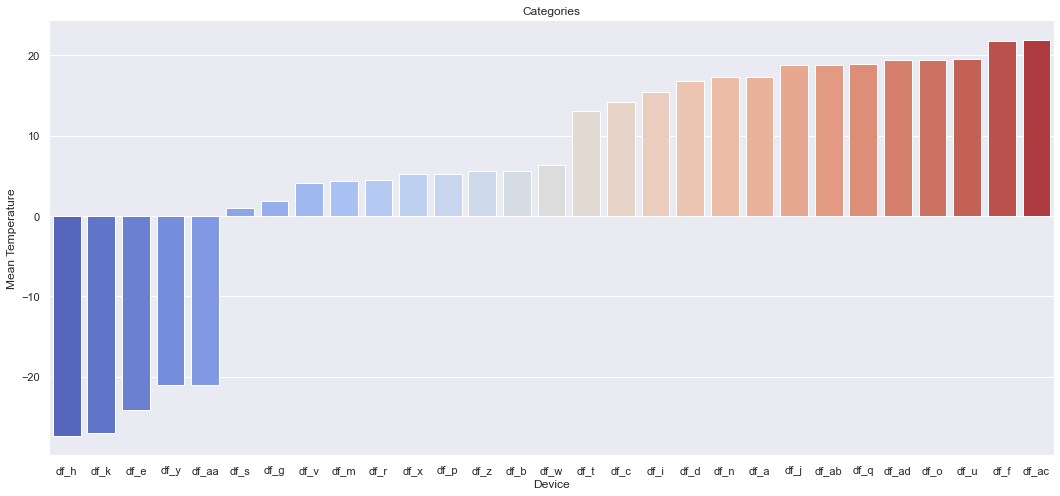

In [22]:
#sns.set_theme(style="whitegrid")
#sns.set_palette(sns.color_pallete("icefire"),as_cmap=True)
sns.set(rc={'figure.figsize':(18,8)})
sns.barplot(x="Device", 
            y="Mean Temperature", 
            data=mean_temp_dev,
            order=mean_temp_dev.sort_values('Mean Temperature').Device,
            palette = "coolwarm").set(title='Categories')
plt.show()

After plotting the dictionary we can easily see the average temperature for each dataframe and compare them to one another. This will help us with categorizing and labeling our dataframes.

## 5.Categorizing Dataframes

After careful consideration and discussion we decided to seperate our dataframes into three distinct categories: Freezer, Fridge, Pantry

In [23]:
#barchart per category
#check the order
mean_temp_dev.sort_values(by='Mean Temperature',ascending=True).T

,11,14,8,27,1,21,10,24,15,20,...,16,0,13,2,19,4,17,23,9,3
Device,df_h,df_k,df_e,df_y,df_aa,df_s,df_g,df_v,df_m,df_r,...,df_n,df_a,df_j,df_ab,df_q,df_ad,df_o,df_u,df_f,df_ac
Mean Temperature,-27.33,-26.97,-24.13,-21.1,-21.0,0.96,1.91,4.14,4.37,4.53,...,17.24,17.33,18.83,18.83,18.89,19.41,19.43,19.53,21.75,21.87


In [24]:
#categories
categories = []
customer_types = [
"",
"Food counter",
"",
"Medical facility",
"",
"Pharmacy",
"",
"Food production",
"Food production",
"Food counter",
"Food transport",
"Food production",
"",
"",
"Lab",
"Medical facility",
"",
"",
"Medical facility",
"Food production",
"Food counter",
"Food production",
"",
"",
"Medical facility",
"Pharmacy",
"Pharmacy",
"Lab",
"Pharmacy",
]

for value in mean_temp_dev['Mean Temperature']:
    if value < 0: 
        categories.append('Freezer')
    elif 0 <= value <= 8: 
        categories.append('Refrigerator')
    elif 14 <= value < 22:
        categories.append('Mapping')
    else: 
        categories.append('Unknown')

mean_temp_dev['Categories']  = categories
mean_temp_dev["Customer type"] = customer_types
mean_temp_dev.T

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
Device,df_a,df_aa,df_ab,df_ac,df_ad,df_b,df_c,df_d,df_e,df_f,...,df_q,df_r,df_s,df_t,df_u,df_v,df_w,df_x,df_y,df_z
Mean Temperature,17.33,-21.0,18.83,21.87,19.41,5.55,14.15,16.84,-24.13,21.75,...,18.89,4.53,0.96,13.0,19.53,4.14,6.36,5.19,-21.1,5.54
Categories,Mapping,Freezer,Mapping,Mapping,Mapping,Refrigerator,Mapping,Mapping,Freezer,Mapping,...,Mapping,Refrigerator,Refrigerator,Unknown,Mapping,Refrigerator,Refrigerator,Refrigerator,Freezer,Refrigerator
Customer type,,Food counter,,Medical facility,,Pharmacy,,Food production,Food production,Food counter,...,Food production,Food counter,Food production,,,Medical facility,Pharmacy,Pharmacy,Lab,Pharmacy


In [14]:
#warning message
warnings.filterwarnings("ignore")

mean_temp_dev['Categories'] = mean_temp_dev['Categories'].apply(lambda x: x.strip())

# Modify Categories based on Customer Type
for x in range(len(customer_types)):
    if mean_temp_dev['Categories'][x] == "Freezer":
        ## Code for Freezer
        pass
    elif mean_temp_dev['Categories'][x] == "Refrigerator":
        ## Code for fridge
        pass
    elif mean_temp_dev['Categories'][x] == "Mapping":
        ## Code for Mapping
        if mean_temp_dev['Customer type'][x] == "Medical facility":
            mean_temp_dev['Categories'][x] = "Incubator"
        elif mean_temp_dev['Customer type'][x] == "Food production":
            if mean_temp_dev['Mean Temperature'][x] > 17:
                mean_temp_dev['Categories'][x] = "Production area"
            else:
                mean_temp_dev['Categories'][x] = "Storage"
mean_temp_dev

,Device,Mean Temperature,Categories,Customer type
0,df_a,17.33,Mapping,
1,df_aa,-21.00,Freezer,Food counter
2,df_ab,18.83,Mapping,
3,df_ac,21.87,Incubator,Medical facility
4,df_ad,19.41,Mapping,
5,df_b,5.55,Refrigerator,Pharmacy
6,df_c,14.15,Mapping,
7,df_d,16.84,Storage,Food production
8,df_e,-24.13,Freezer,Food production
9,df_f,21.75,Mapping,Food counter


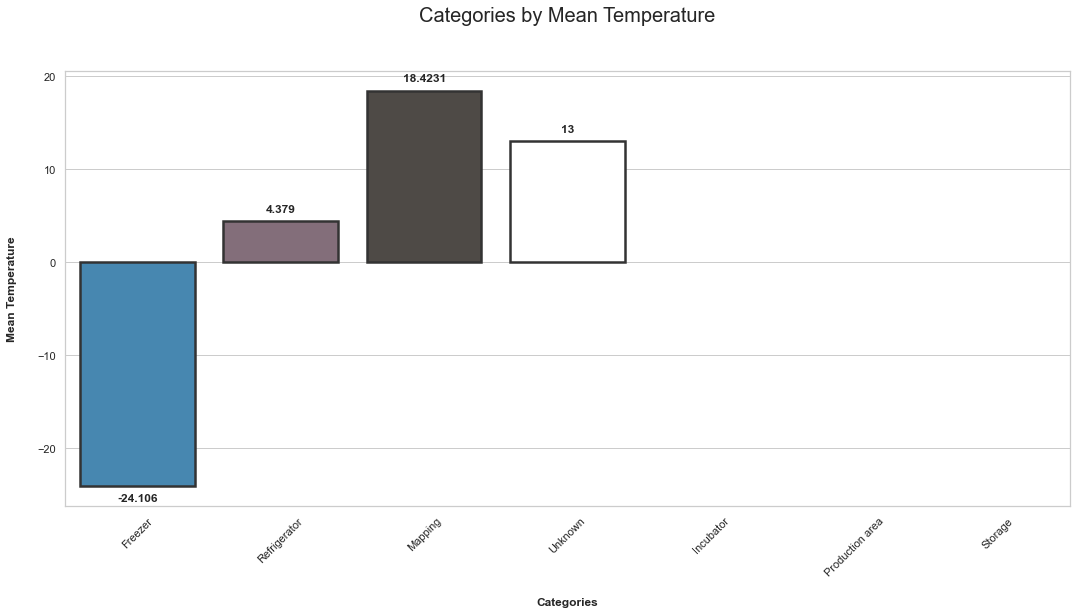

In [26]:
#usually goes from like amount of the devices there is
sns.set_style("whitegrid")
#add color
colors = ["#368BC1", "#876A7B", "#4F4A45","#FFFFFF","#46D5F0","#E4E846","#F29349"]

#barchart per category
plot = sns.barplot(data=mean_temp_dev,
                x="Categories",
                y="Mean Temperature",
                palette = colors,
                linewidth=2.5,
                edgecolor=".2",
                ci=None,
                order=["Freezer", "Refrigerator","Mapping",'Unknown','Incubator',"Production area","Storage"])
#label
plt.bar_label(plot.containers[0], label_type='edge', fontweight='bold',padding=7)

#additional
plt.title('Categories by Mean Temperature',fontsize=20,y=1.1)
plt.ylabel('Mean Temperature',fontweight='bold',labelpad=20)
plt.xlabel('Categories',fontweight='bold',labelpad=20)
plt.xticks(rotation=45)
plt.show()

As can be seen, each gadget was assigned to one of three groups:
- ``Freezer``: devices with temperature lower than 0.
- ``Refrigerator``: devices with temperature higher or equal than 0, but lower or equal than 8.
- ``Mapping``: devices with temperature higher or equal than 14, but lower than 22.
- ``Unknown``: devices with temperature outside the temperature range and we do not know for what it's being use.
- ``Incubator``: devices with the mapping temperature but use in the medical facility.
- ``Production Area``: devices with temperature higher than 17, but lower than 22 and use in food production.
- ``Storage``: devices with temperature higher or equal than 14, but lower than 17 and use in food production.

Because the data does not contain any labeling, such categorization is an obvious technique taken by group members through the usage of external resources.

Following the categorization of the devices, we want to observe each device's pattern through a line plot, which will allow us to approach any potential anomalies and subsequently approach the selection of view devices to make the research more comfortable.

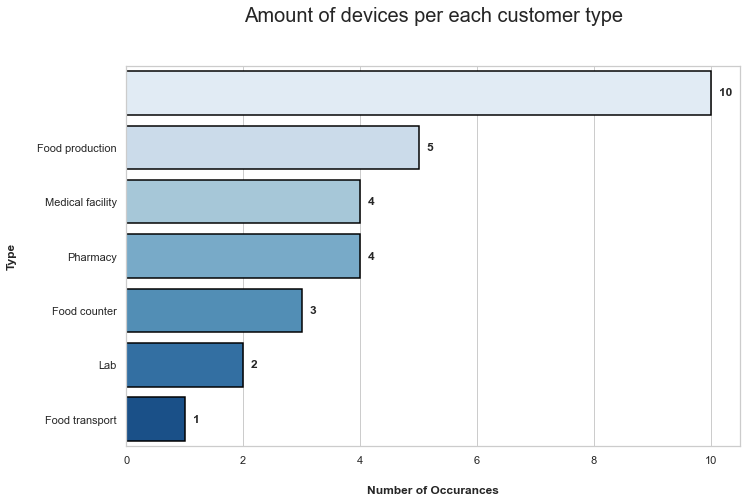

In [16]:
#maybe rename the empty categories to unknown at least? 

#barchart per customer type
#size
fig=plt.figure(figsize=(11,7))

#categorical distribution 
distribution = mean_temp_dev['Customer type'].value_counts()

#visual
plot = sns.barplot(distribution.values,
                   distribution.index,
                   palette = "Blues",
                   linewidth=1.5,
                   edgecolor="black")
plt.bar_label(plot.containers[0], label_type='edge', fontweight='bold',padding=8)
#additionals
plt.title('Amount of devices per each customer type',fontsize=20,y=1.1)
plt.ylabel('Type',fontweight='bold',labelpad=20)
plt.xlabel('Number of Occurances',fontweight='bold',labelpad=20)
plt.show()


# Analysis of Elimination

Here we plot every dataframe divided based on category from which we will pick the most apropriate dataset to train our model on. In order for dataframe to be deemed apropriate for further analysis it needs to fufill the following conditions:
- Data Consistency
- None or very little missing values
- Upper and lower alarm threshold (Optional)

## Elimination of the First Category (Line Plots)

Elimination will be aided by a series of generic graphics, such as line plots to assess consistency, followed by box plots to identify missing values (outliers), and finally a final selection of a device per group.

## Freezer Category

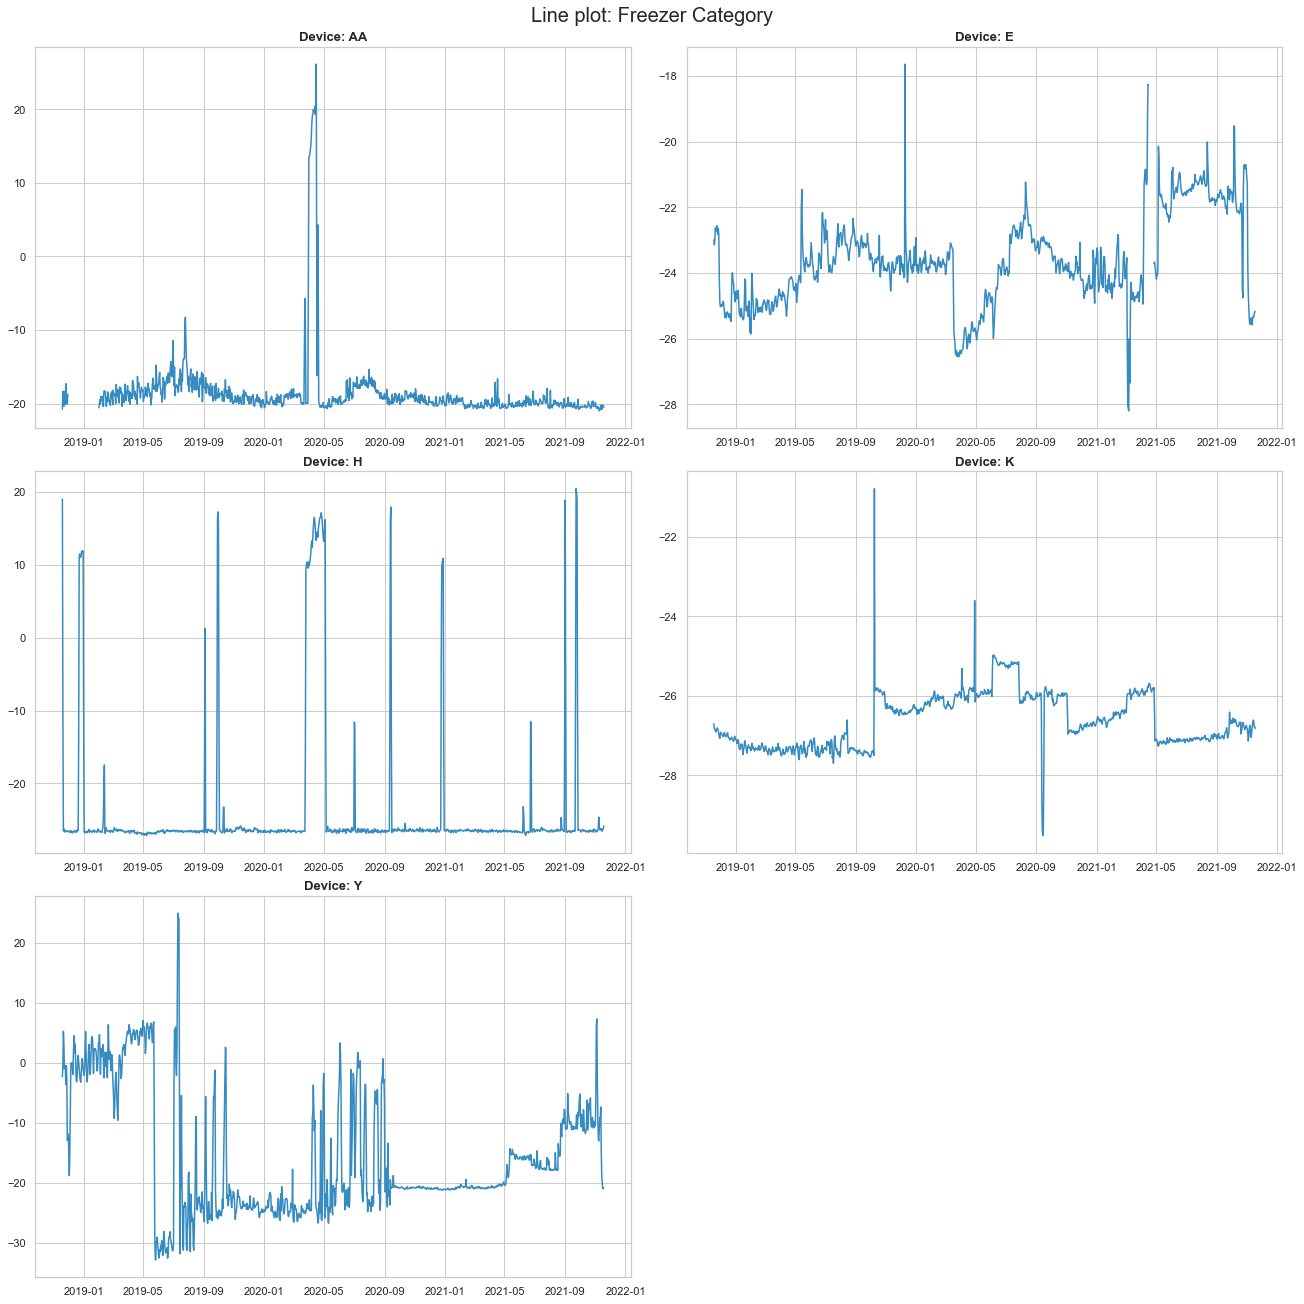

In [40]:
## AA, E, H, K, Y
# Height Margin
# plt.subplots_adjust(hspace=0.5)
fig, axes = plt.subplots(3,2, figsize=(18,18),constrained_layout=True)
fig.suptitle('Line plot: Freezer Category',fontsize=20)

datalist = ["df_aa_daily","df_e_daily","df_h_daily","df_k_daily","df_y_daily",]
titles = ['Device: AA','Device: E','Device: H','Device: K','Device: Y',]
i = -1
j = 0
for idx, (dataset,title) in enumerate(zip(datalist,titles)):
    ## Change Modulo to from 2 to 3 to make a 3-column plot
    if idx % 2 == 0:
        i = i + 1
        j = 0
    else: j = j + 1
    axes[i,j].plot(globals()['%s' % dataset]["Temp"],color='#368BC1')
    axes[i,j].set_title(title,fontweight='bold',fontsize=13)

#fig.suptitle('Fridge Category')

#remove useless axes
fig.delaxes(axes[2,1])
plt.draw()
# fig.tight_layout()

As can be seen, there are 5 devices in the freezer category, all of which detect a small number of anomalies and appear to be consistent in their patterns; however, with so many devices, it will be difficult to approach an analysis for all of them; therefore, to limit our research, we will cut out E and Y devices due to their unprogized prattens that could complicate the modeling, and we will leave them out.

## Refrigerator Category

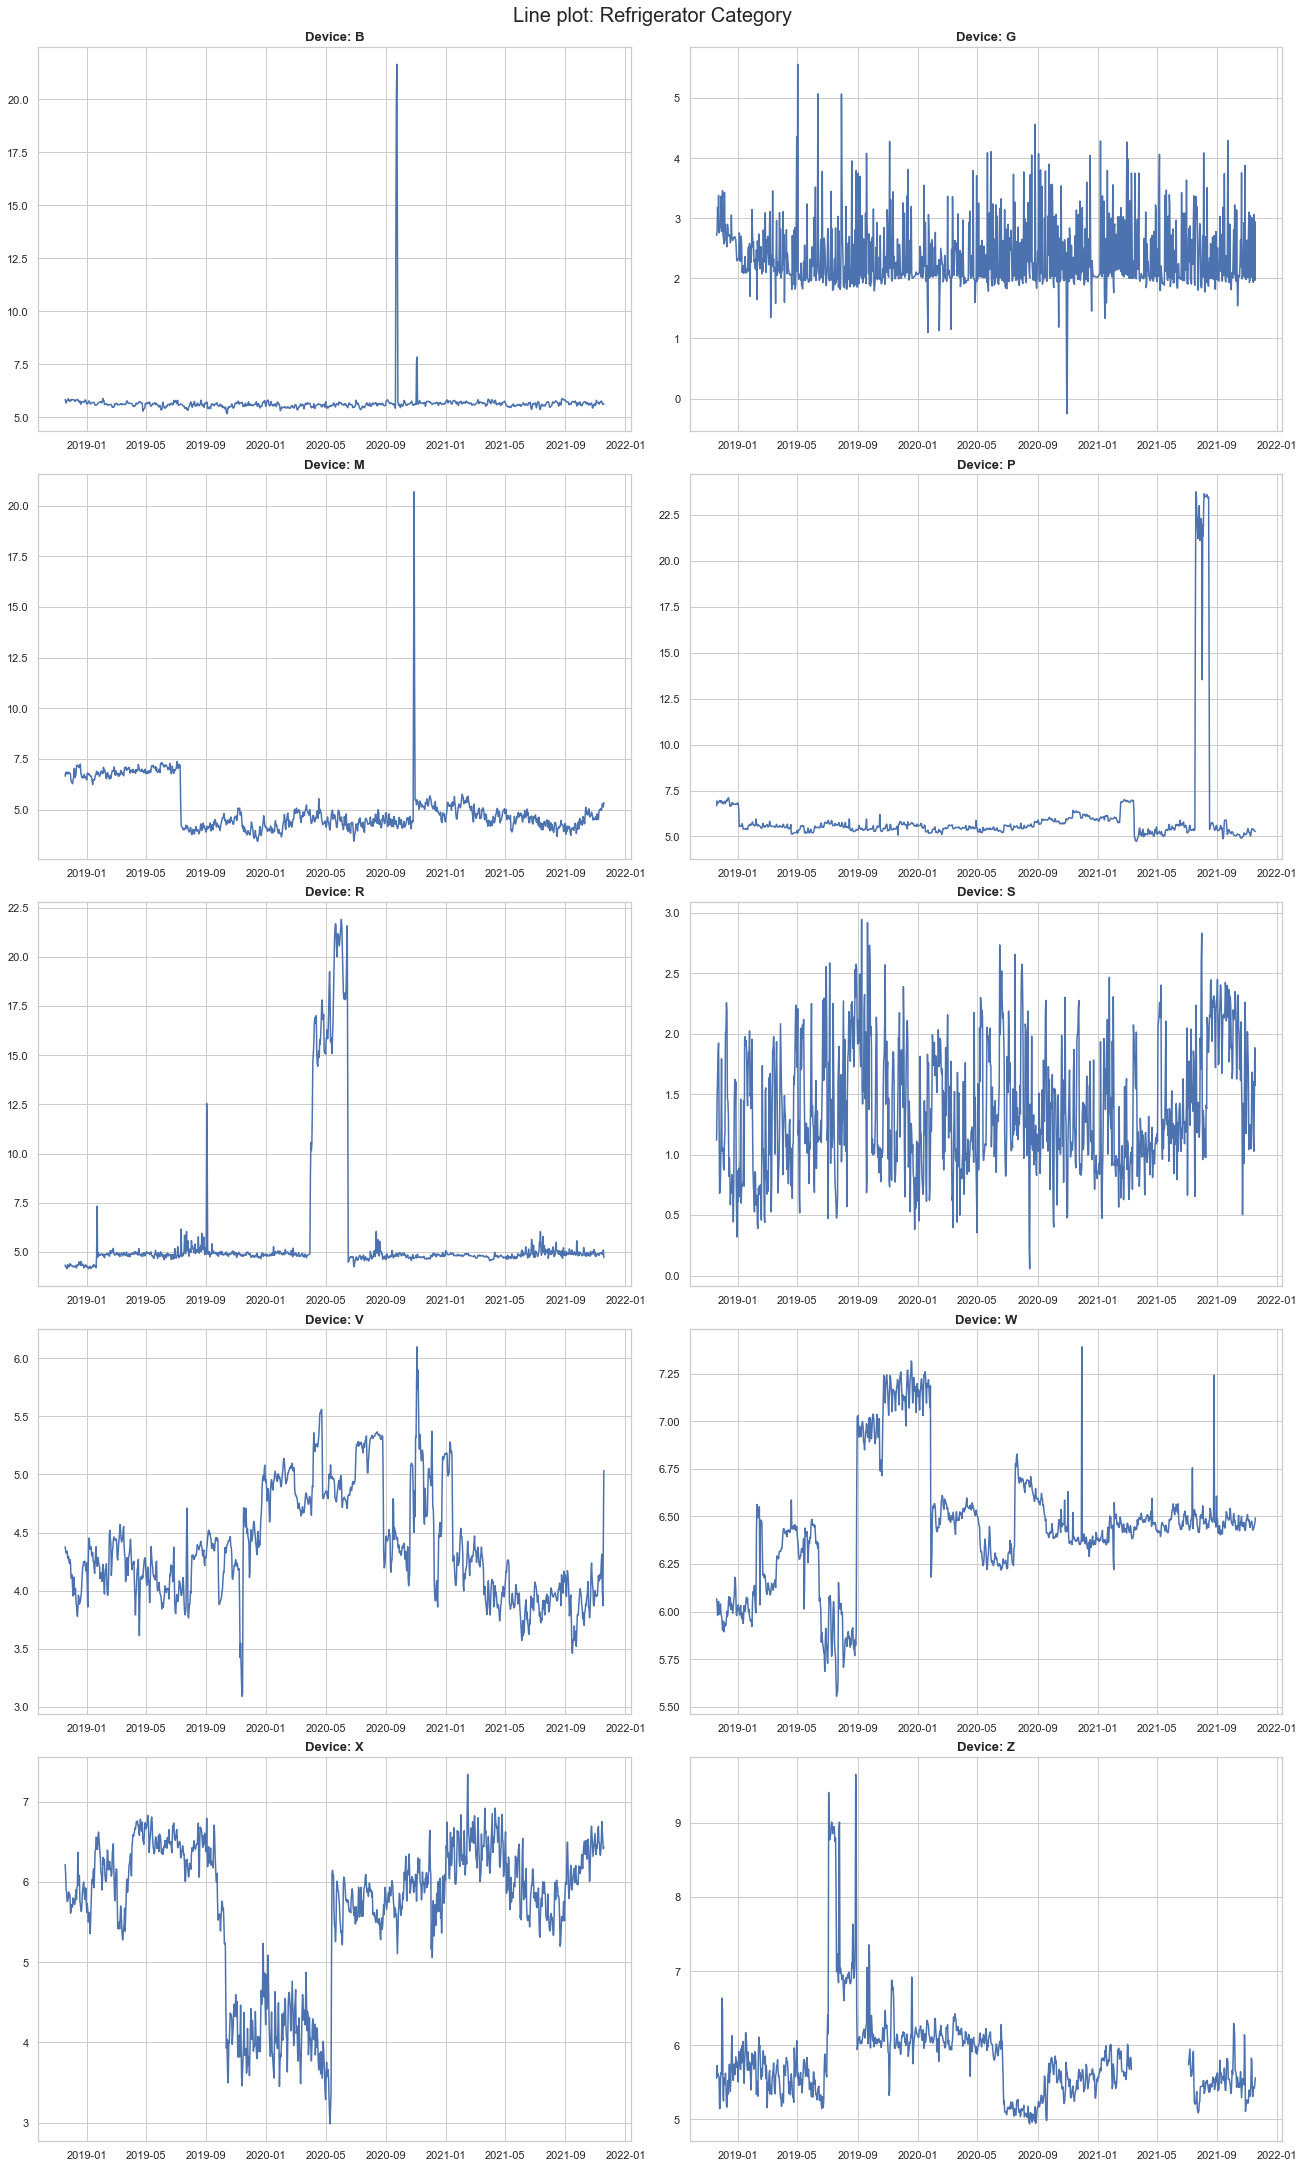

In [34]:
## B, G, M, P, R, S, V, W, X, Z
# Height Margin
# plt.subplots_adjust(hspace=0.5)
fig, axes = plt.subplots(5,2, figsize=(18,30),constrained_layout=True)
fig.suptitle('Line plot: Refrigerator Category',fontsize=20)

datalist = ["df_b_daily","df_g_daily","df_m_daily","df_p_daily","df_r_daily","df_s_daily","df_v_daily","df_w_daily","df_x_daily","df_z_daily"]
titles = ['Device: B','Device: G','Device: M','Device: P','Device: R','Device: S','Device: V','Device: W','Device: X','Device: Z']

i = -1
j = 0
for idx, (dataset,title) in enumerate(zip(datalist,titles)):
    ## Change Modulo to from 2 to 3 to make a 3-column plot
    if idx % 2 == 0:
        i = i + 1
        j = 0
    else: j = j + 1
    axes[i,j].plot(globals()['%s' % dataset]["Temp"])
    axes[i,j].set_title(title,fontweight='bold',fontsize=13)
plt.show()

In comparison to the freezer, the refridgerator approached more devices on its scale and thus more possible dor analysis, but it also stayed above due to a complication of the amount provided, which could slow down the research and modeling. For future steps, we would like to stick with device B, S, and G because of their lack of anomalies and pattern consistency.

## Mapping Category

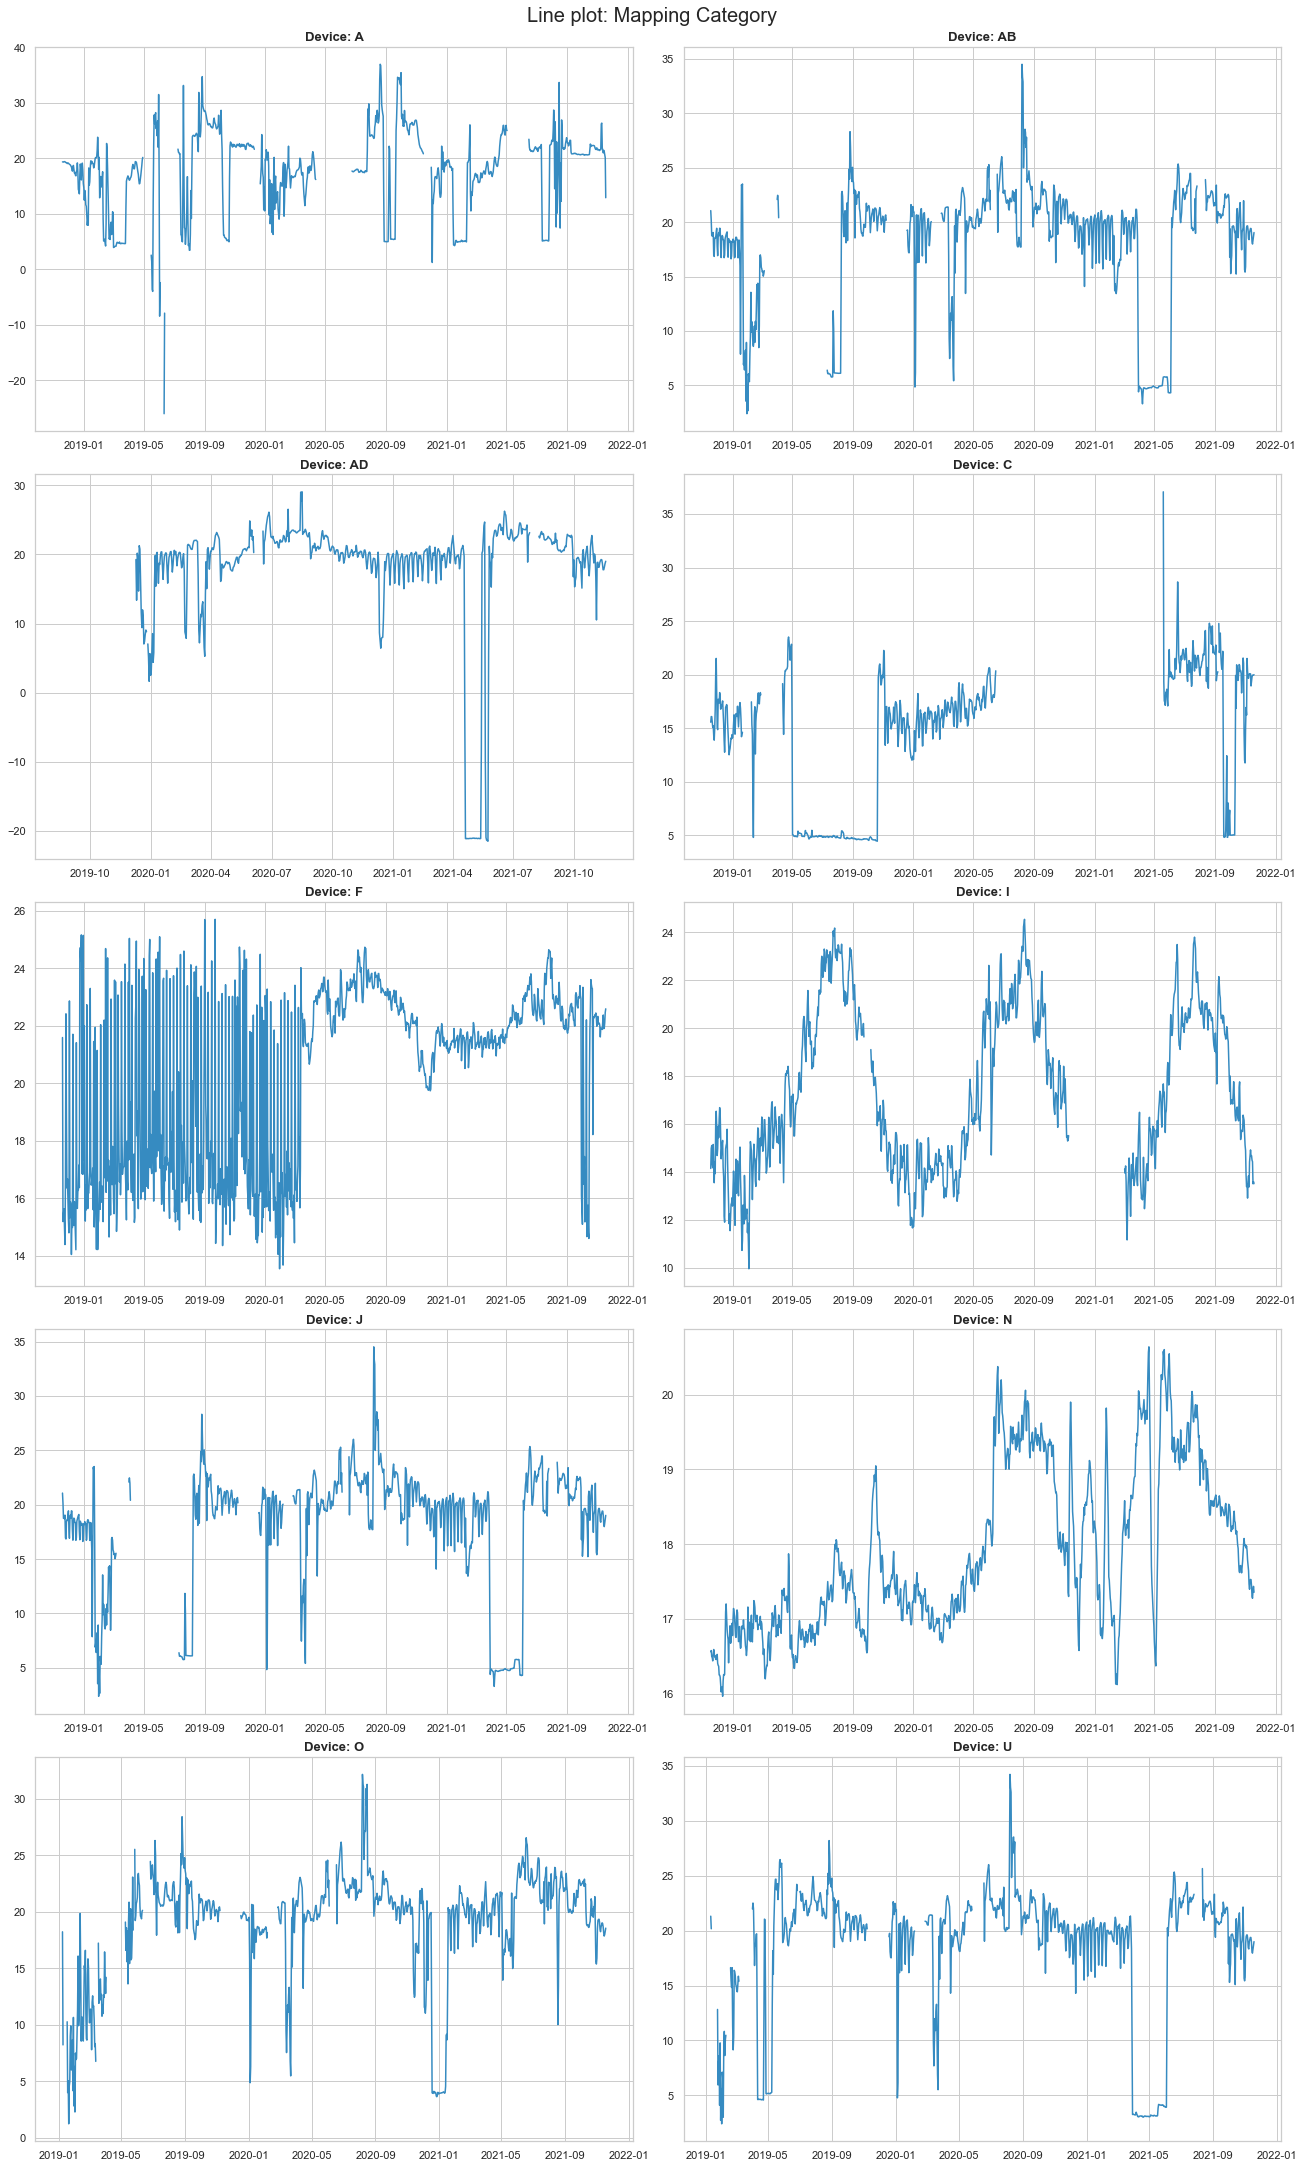

In [33]:
## A, AB, AD, C, F, I, J, N, O, U
#image
fig, axes = plt.subplots(5,2, figsize=(18,30),constrained_layout=True)
fig.suptitle('Line plot: Mapping Category',fontsize=20)

datalist = ["df_a_daily","df_ab_daily","df_ad_daily","df_c_daily","df_f_daily","df_i_daily","df_j_daily","df_n_daily","df_o_daily","df_u_daily",]
titles = ['Device: A','Device: AB','Device: AD','Device: C','Device: F','Device: I','Device: J','Device: N','Device: O','Device: U',]
i = -1
j = 0
for idx, (dataset,title) in enumerate(zip(datalist,titles)):
    ## Change Modulo to from 2 to 3 to make a 3-column plot
    if idx % 2 == 0:
        i = i + 1
        j = 0
    else: j = j + 1
    axes[i,j].plot(globals()['%s' % dataset]["Temp"],color='#368BC1')
    axes[i,j].set_title(title,fontweight='bold',fontsize=13)

plt.show()

When it came to the mapping, it can be seen that the majority of the devices ended up in this group, which could be due to the scale range that we provided, but within a follow-up for the freezer and fridge, this part allowed us to see the pattern and provide additional limitations so that we could continue with our analysis phase.

## Rest of the categories: Incubator, Production Area and Storage

As previously discussed, categories such as incubator, production area, and storage all imply only one device per group, and for the sake of simplicity, all of them will be combined and studied in this stage.

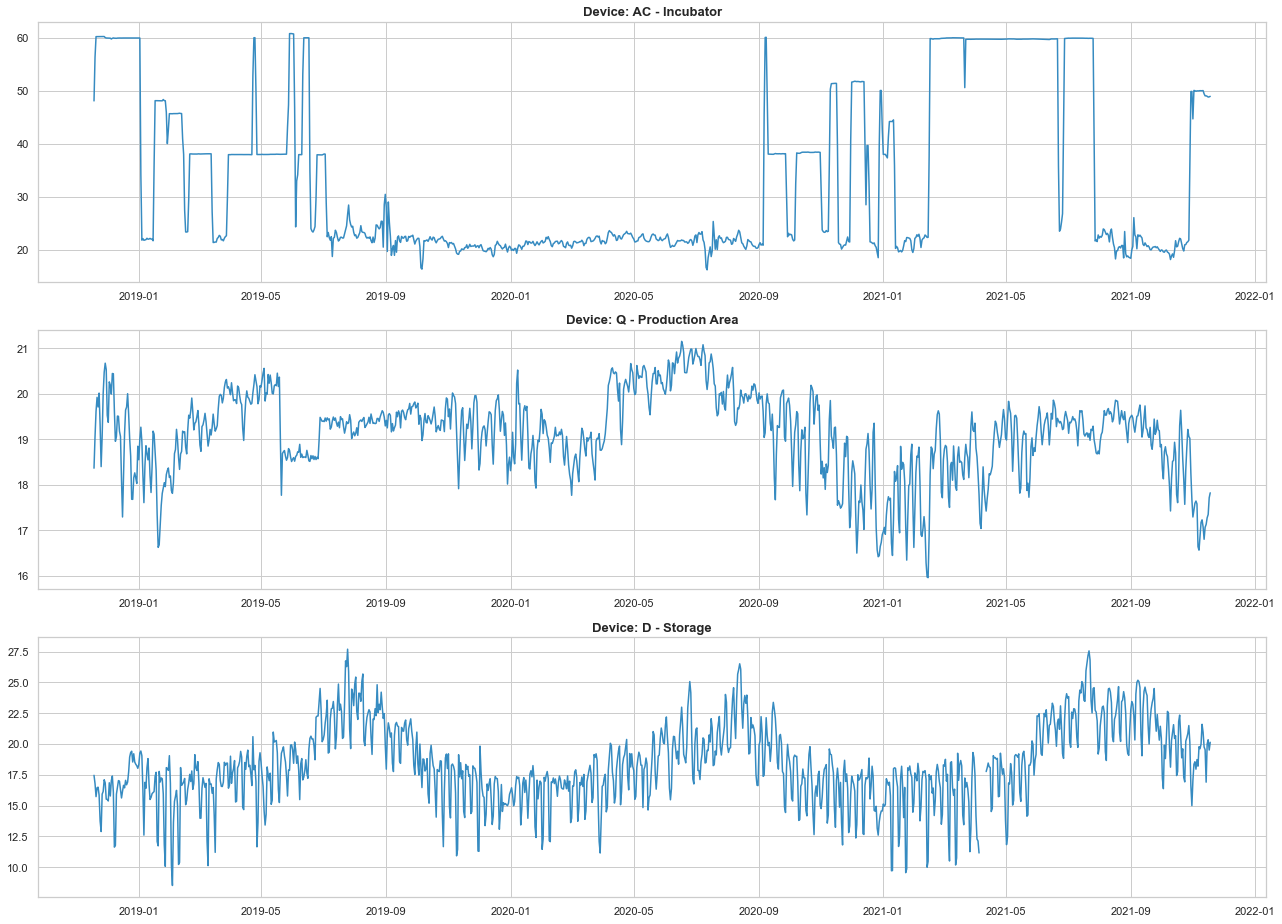

In [50]:
#AC, Q and D

fig, axes = plt.subplots(3,1, figsize=(18,13),constrained_layout=True)

datalist = ["df_ac_daily","df_q_daily","df_d_daily",]
titles = ['Device: AC - Incubator','Device: Q - Production Area','Device: D - Storage',]

i = -1
j = 0
for idx, (dataset,title) in enumerate(zip(datalist,titles)):
    ## Change Modulo to from 2 to 3 to make a 3-column plot
    if idx % 1 == 0:
        i = i + 1
        j = 0
    else: j = j + 1
    axes[i].plot(globals()['%s' % dataset]["Temp"],color='#368BC1')
    axes[i].set_title(title,fontweight='bold',fontsize=13)

# axes[0].plot(df_ac_daily["Temp"],color="#46D5F0")
# axes[1].plot(df_q_daily["Temp"],color="#E4E846")
# axes[2].plot(df_d_daily["Temp"],color="#F29349")

plt.tight_layout()
plt.show()

Because each of the provided categories is followed by only one device, all of them will be evaluated further. However, it can already be seen that **Device D** has the most consistency of all of them, which may influence further elimination. However, this will lead to outliers, which will be covered in the next step.

## Elimination of the Second Category (Box Plots)

After defining the consistency within each category, it's time to assess further. To do so, we'll look for outliers among the top three picks we made in the previous stage, before settling on the final device, which will then be evaluated further.

## Freezers

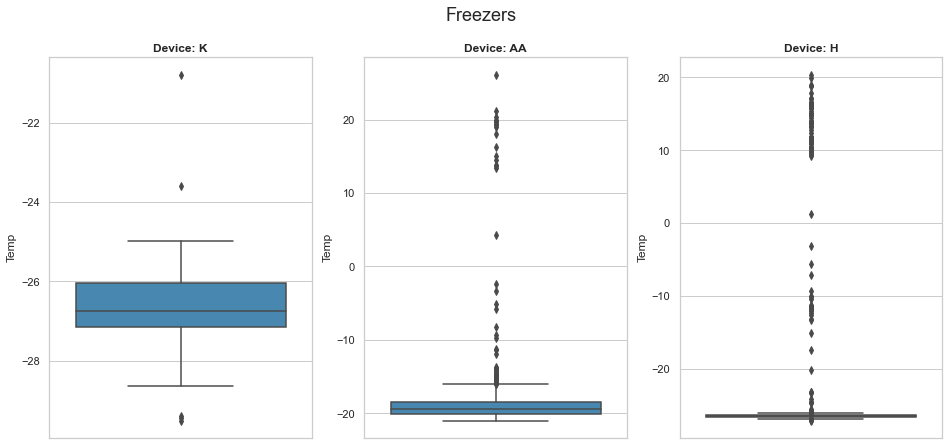

In [63]:
fig, axes = plt.subplots(1,3, figsize=(16,7))
fig.suptitle('Freezers',fontsize=18)
sns.boxplot(ax=axes[0],y="Temp",data=df_k_daily,color='#368BC1')
sns.boxplot(ax=axes[1],y="Temp",data=df_aa_daily,color='#368BC1')
sns.boxplot(ax=axes[2],y="Temp",data=df_h_daily,color='#368BC1')
axes[0].set_title('Device: K',fontweight='bold')
axes[1].set_title('Device: AA',fontweight='bold')
axes[2].set_title('Device: H',fontweight='bold')
plt.show()

Based on the results, we will choose **device K** since it has less outliers than devices AA and H, which can be easily spotted within a large number of them, slowing down our research and harming further modeling. As a consequence, we will continue to use device K for future study.

## Refrigerators

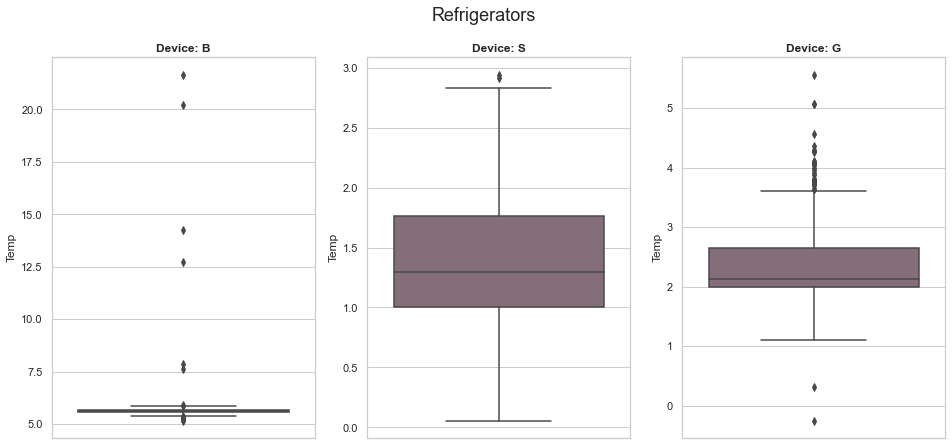

In [62]:
fig, axes = plt.subplots(1,3, figsize=(16,7))
fig.suptitle('Refrigerators',fontsize=18)
sns.boxplot(ax=axes[0],y="Temp",data=df_b_daily,color='#876A7B')
sns.boxplot(ax=axes[1],y="Temp",data=df_s_daily,color='#876A7B')
sns.boxplot(ax=axes[2],y="Temp",data=df_g_daily,color='#876A7B')
axes[0].set_title('Device: B',fontweight='bold')
axes[1].set_title('Device: S',fontweight='bold')
axes[2].set_title('Device: G',fontweight='bold')
plt.show()

In the case of the refrigerator, it is clear that device B will be eliminated due to its outliers, and that device G will be eliminated due to the outliers accumulating in the scale from 5 to 4 degrees. As a result, we will stick with **device S**, even though it contributed to a few of the outliers, because it is more useful for further research and modeling than the other two.

## Mapping

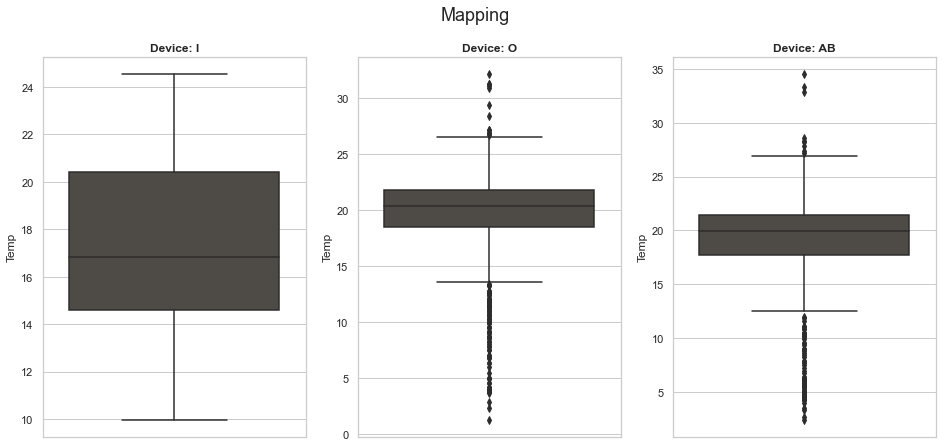

In [64]:
fig, axes = plt.subplots(1,3, figsize=(16,7))
fig.suptitle('Mapping',fontsize=18)
sns.boxplot(ax=axes[0],y="Temp",data=df_i_daily,color='#4F4A45')
sns.boxplot(ax=axes[1],y="Temp",data=df_o_daily,color='#4F4A45')
sns.boxplot(ax=axes[2],y="Temp",data=df_ab_daily,color='#4F4A45')
axes[0].set_title('Device: I',fontweight='bold')
axes[1].set_title('Device: O',fontweight='bold')
axes[2].set_title('Device: AB',fontweight='bold')
plt.show()

Following the same pattern as before, we will stick to **device I** as our main research recognition for the pantry category, based on the outliers in device D and AB. This is done with the idea that trained models with outliers will increase error variance and reduce the power of statistical tests for our modeling, so we approached to be sticking with device I.

## Rest of the categories: Incubator, Production Area and Storage

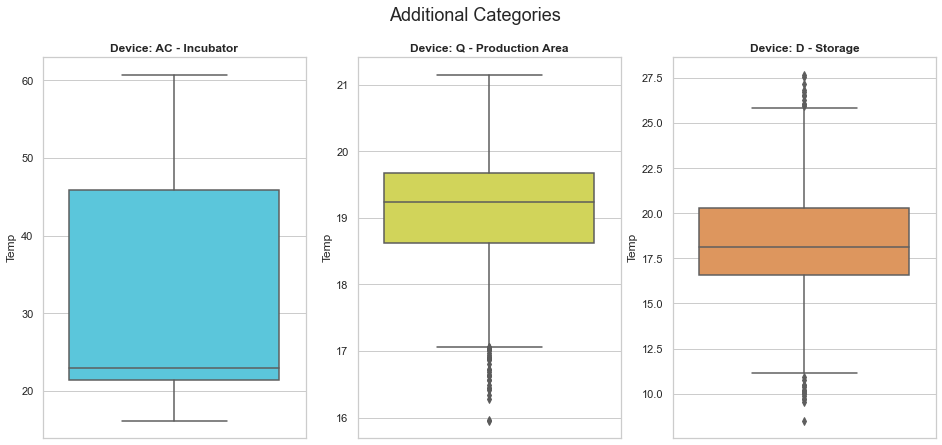

In [65]:
fig, axes = plt.subplots(1,3, figsize=(16,7))
fig.suptitle('Additional Categories',fontsize=18)
sns.boxplot(ax=axes[0],y="Temp",data=df_ac_daily,color="#46D5F0")
sns.boxplot(ax=axes[1],y="Temp",data=df_q_daily,color="#E4E846")
sns.boxplot(ax=axes[2],y="Temp",data=df_d_daily,color="#F29349")

axes[0].set_title('Device: AC - Incubator',fontweight='bold')
axes[1].set_title('Device: Q - Production Area',fontweight='bold')
axes[2].set_title('Device: D - Storage',fontweight='bold')

plt.show()

As can be seen, device AC has the fewest outliers compared to the other two, whereas device D has the most, which is surprising given the consistency above. However, if we include the prior step, we will still take a chance and choose **Device D** as our final option.

## Conclusion

Based on the analysis that we've done, we decide to use **Device K** for the freezer, **Device S** for the Refrigerator, **Device I** for the mapping, and lastly **Device D** for extra.

# Analysis for Device K (Freezer)

### 1.Missing Data

Before going deeper into the device's initial analysis, it's a good idea to check for any missing data first. 

In [66]:
df_k.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 315648 entries, 2018-11-18 16:40:00 to 2021-11-18 16:35:00
Freq: 5T
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Temp    315589 non-null  float64
dtypes: float64(1)
memory usage: 4.8 MB


In [67]:
df_k.isna().sum()

Temp    59
dtype: int64

Following the evaluation of the data based on the *Device K*, it is clear that this device has 59 null values out of a total of 315.648, which is a significant portion of the total.

### 2.Outliers and Seasonality Overview

From the plot below, we can see that on the first plot is showing the outliers from device K in each month, the second plot is showing the overview for the entire week, and lastly the third plot is showing us the overview for the whole day (24 Hours).

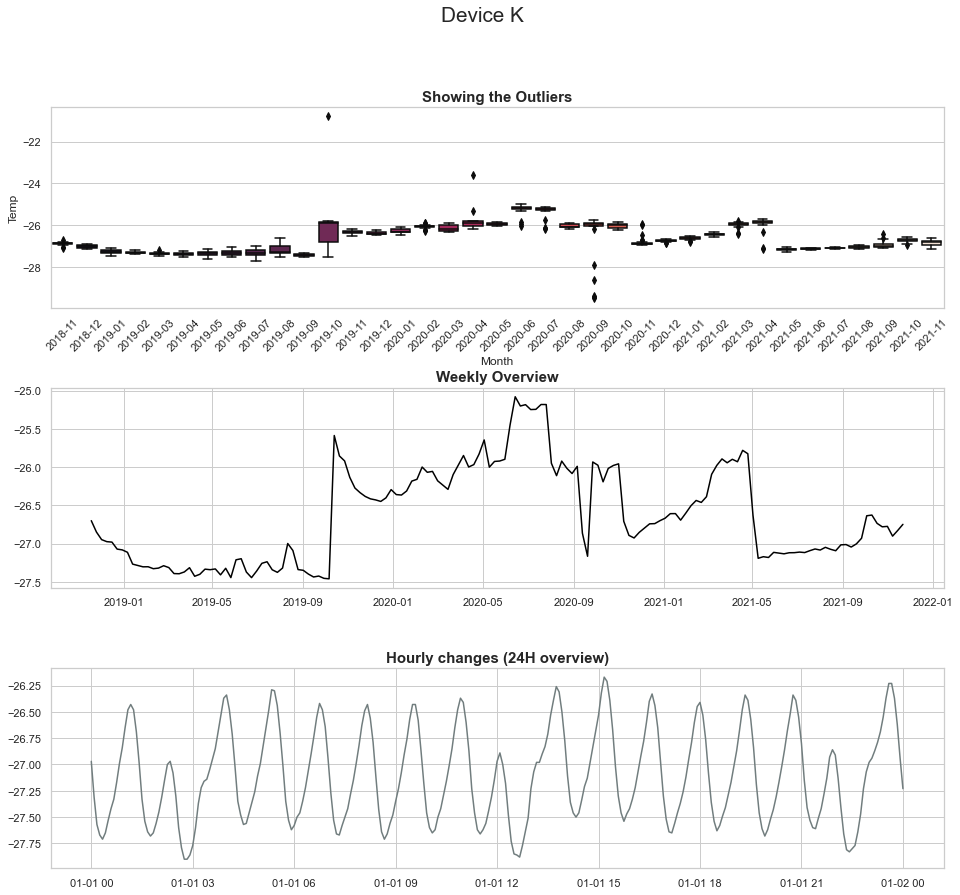

In [68]:
df_k_copy = df_k_daily.copy()
df_k_copy["Month"] = df_k_copy.index.to_period('M')

df_k_zoom = df_k.loc["2019-01-01 00:00:00":"2019-01-02 00:00:00"]

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(16,14))
plt.subplots_adjust(hspace=0.4)
sns.boxplot(ax=axes[0],x="Month",y="Temp",data=df_k_copy,palette = "rocket")
fig.suptitle('Device K',fontsize="xx-large")
axes[0].set_xticklabels(axes[0].get_xticklabels(),rotation = 45)
axes[1].plot(df_k_weekly,color='black' )
axes[2].plot(df_k_zoom,color='#717D7E')
axes[0].set_title('Showing the Outliers', fontsize=15,fontweight='bold')
axes[1].set_title('Weekly Overview', fontsize=15,fontweight='bold')
axes[2].set_title('Hourly changes (24H overview)', fontsize=15,fontweight='bold')
plt.show()

### 3.Upper and Lower Limits

Upper and lower limits are taken from another dataset; for example, for device K, the upper limit is -20 and the bottom limit is unknown; to show this, as well as the device's consistency through time, see the visual below.

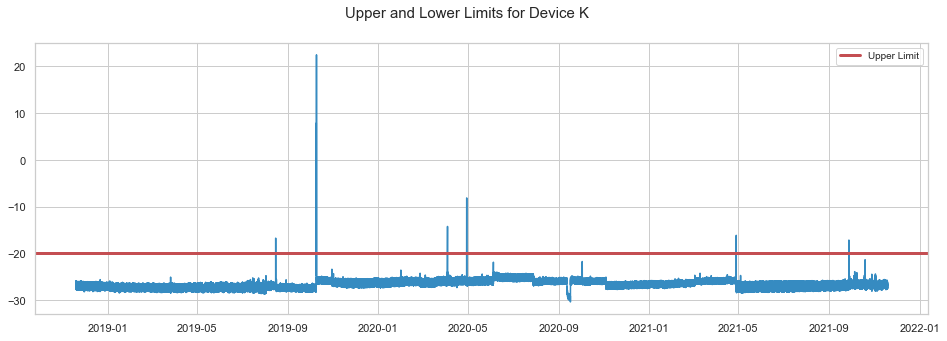

In [69]:
fig, axes = plt.subplots(1,1, figsize=(16,5))
fig.suptitle('Upper and Lower Limits for Device K',fontsize=15)
plt.plot(df_k,color='#368BC1')
plt.axhline(y=-20,color='r',linestyle='-',label='Upper Limit',linewidth=3) #taken from another dataset

plt.legend(prop={'size': 10})

plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10) 

plt.show()

### 4.Seasonal Decomposition

From the plot below we can see the actual dataset, we can the trend of the data, we can see if there's seasonality in the data, and lastly we can see if there's any residual in our data.

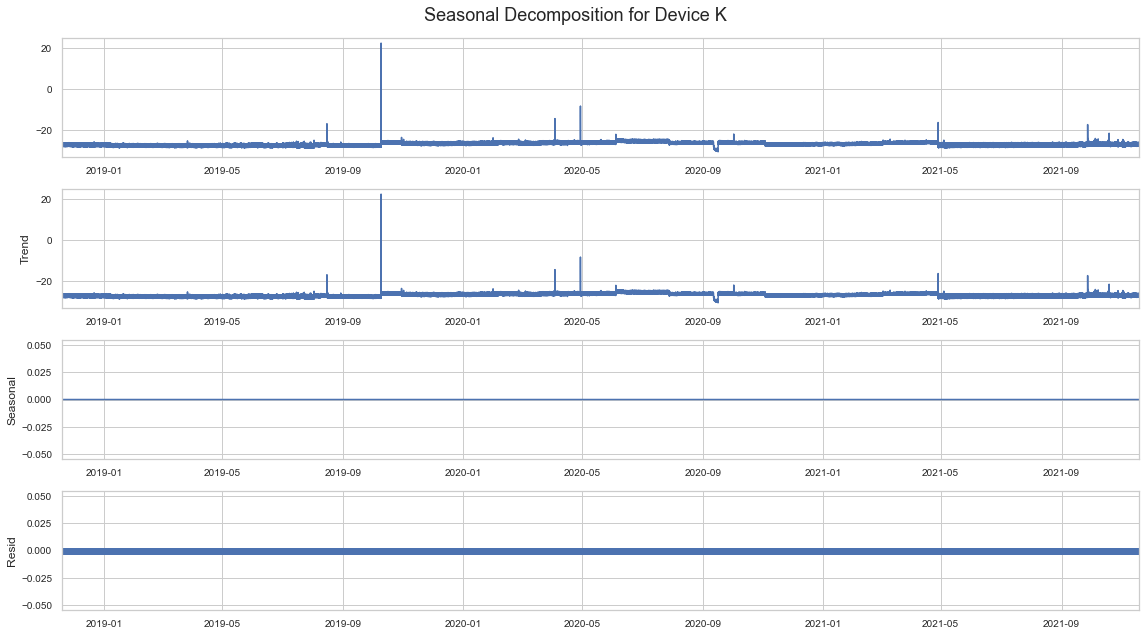

In [70]:
result = seasonal_decompose(df_k.dropna(), model='additive', period=1)
fig = result.plot()
fig.suptitle('Seasonal Decomposition for Device K',fontsize=18)
fig.set_size_inches((16, 9))

plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

#extra
fig.tight_layout()
plt.show()

# Analysis for Device S (Refrigerators)

### 1.Missing Data

Before going deeper into the device's initial analysis, it's a good idea to check for any missing data first, it comes down to similar steps as the previous device.

In [71]:
df_s.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 315647 entries, 2018-11-18 16:50:00 to 2021-11-18 16:40:00
Freq: 5T
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Temp    315640 non-null  float64
dtypes: float64(1)
memory usage: 4.8 MB


In [72]:
df_s.isna().sum()

Temp    7
dtype: int64

As can be seen on this analysis, *device S* contains up to 7 missng values, which is much lower compare to the previous device and a total of 315.648.

### 2.Outliers and Seasonality Overview

From the plot below, we can see that on the first plot is showing the outliers from device S in each month, the second plot is showing the overview for the entire week, and lastly the third plot is showing us the overview for the whole day (24 Hours).

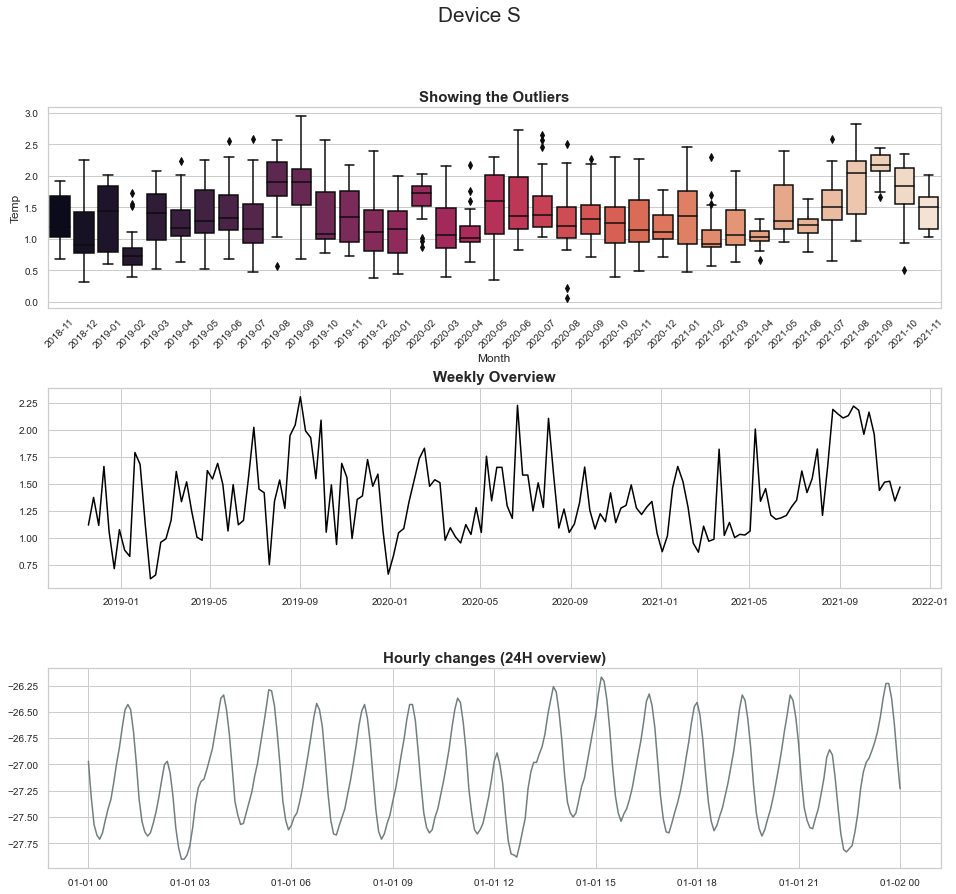

In [73]:
df_s_copy = df_s_daily.copy()
df_s_copy["Month"] = df_s_copy.index.to_period('M')

df_s_zoom = df_k.loc["2019-01-01 00:00:00":"2019-01-02 00:00:00"]

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(16,14))
plt.subplots_adjust(hspace=0.4)
sns.boxplot(ax=axes[0],x="Month",y="Temp",data=df_s_copy,palette = "rocket")
fig.suptitle('Device S',fontsize="xx-large")
axes[0].set_xticklabels(axes[0].get_xticklabels(),rotation = 45)
axes[1].plot(df_s_weekly,color='black' )
axes[2].plot(df_s_zoom,color='#717D7E')
axes[0].set_title('Showing the Outliers', fontsize=15,fontweight='bold')
axes[1].set_title('Weekly Overview', fontsize=15,fontweight='bold')
axes[2].set_title('Hourly changes (24H overview)', fontsize=15,fontweight='bold')
plt.show()

### 3.Upper and Lower Limits

Upper and lower limits are taken from another dataset; for example, for device S, the upper limit is 25 and the bottom limit is 8; to show this, as well as the device's consistency through time, see the visual below.

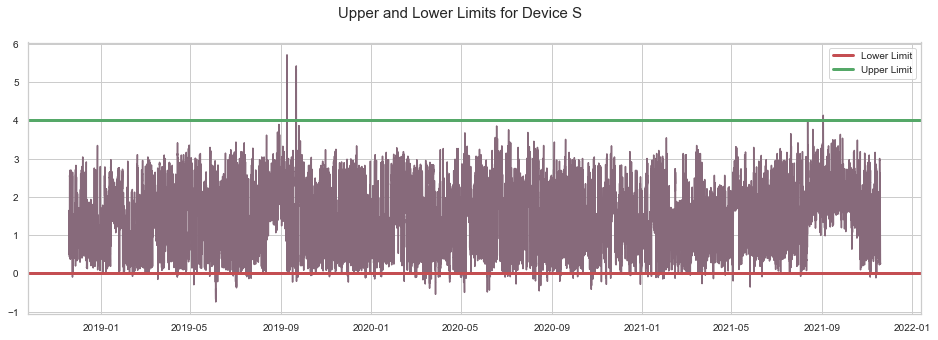

In [74]:
fig, axes = plt.subplots(1,1, figsize=(16,5))
fig.suptitle('Upper and Lower Limits for Device S',fontsize=15)
plt.plot(df_s,color='#876A7B')
plt.axhline(y=0,color='r',linestyle='-',label='Lower Limit',linewidth=3) #taken from another dataset
plt.axhline(y=4,color='g',linestyle='-',label='Upper Limit',linewidth=3)

plt.legend(prop={'size': 10})

plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10) 

plt.show()

### 4.Seasonal Decomposition

From the plot below we can see the actual dataset, we can the trend of the data, we can see if there's seasonality in the data, and lastly we can see if there's any residual in our data.

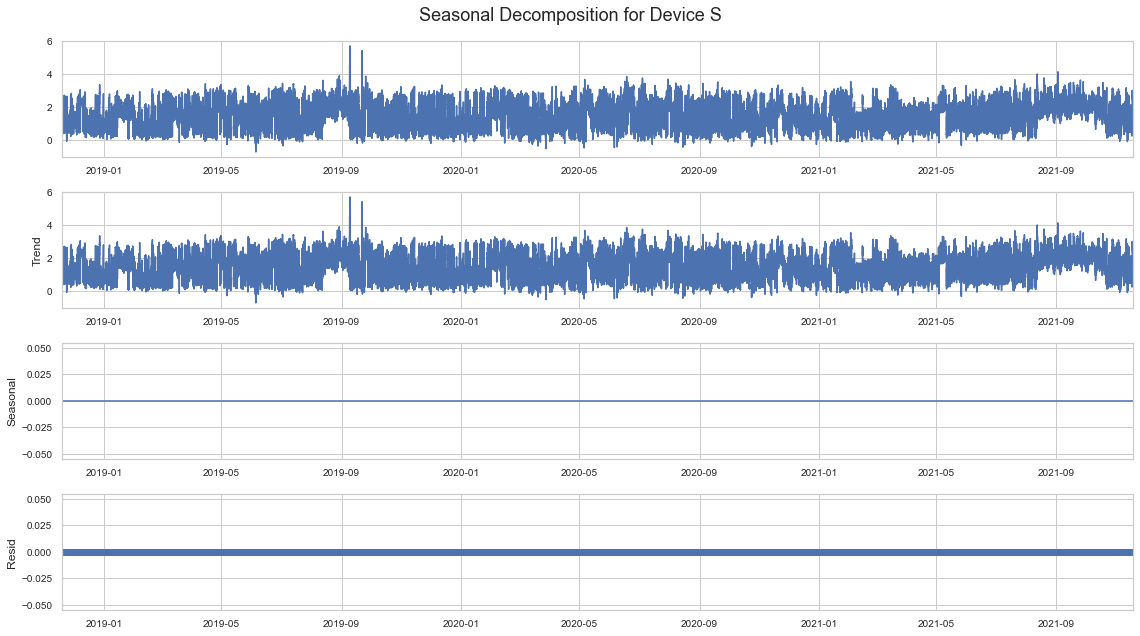

In [75]:
result = seasonal_decompose(df_s.dropna(), model='additive', period=1)
fig = result.plot()
fig.suptitle('Seasonal Decomposition for Device S',fontsize=18)
fig.set_size_inches((16, 9))

plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

#extra
fig.tight_layout()
plt.show()

# Analysis for Device I (Mapping)

### 1.Missing Data

In [76]:
df_i.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 315648 entries, 2018-11-18 16:35:00 to 2021-11-18 16:30:00
Freq: 5T
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Temp    278713 non-null  float64
dtypes: float64(1)
memory usage: 4.8 MB


In [77]:
df_i.isna().sum()

Temp    36935
dtype: int64

In [78]:
df_i.rename(columns = {'y':'Temp'}, inplace = True)

<AxesSubplot:ylabel='EventDt'>

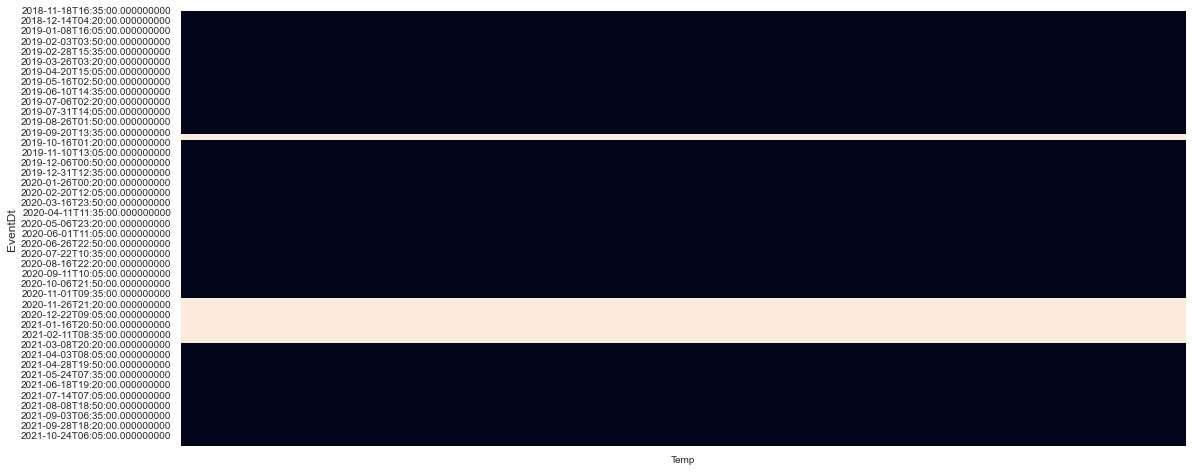

In [79]:
sns.heatmap(df_i.isnull(), cbar=False)

### 2.Outliers and Seasonality Overview

From the plot below, we can see that on the first plot is showing the outliers from device I in each month, the second plot is showing the overview for the entire week, and lastly the third plot is showing us the overview for the whole day (24 Hours).

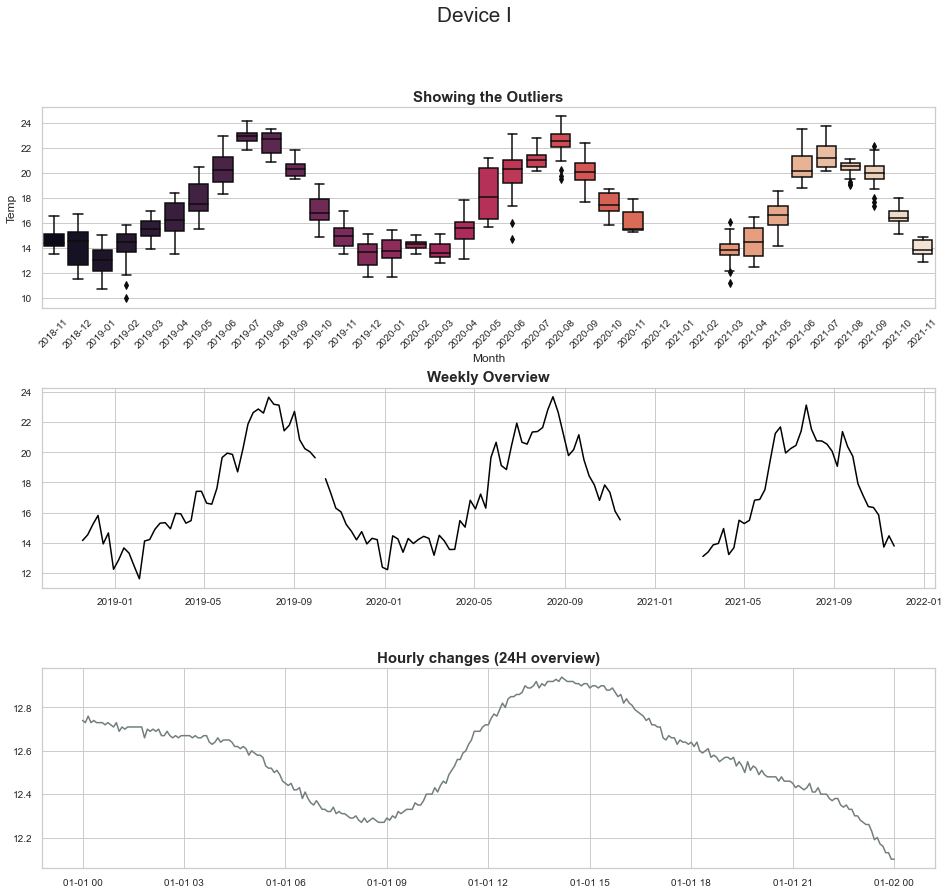

In [80]:
df_i_copy = df_i_daily.copy()
df_i_copy["Month"] = df_i_copy.index.to_period('M')

df_i_zoom = df_i.loc["2019-01-01 00:00:00":"2019-01-02 00:00:00"]

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(16,14))
plt.subplots_adjust(hspace=0.4)
sns.boxplot(ax=axes[0],x="Month",y="Temp",data=df_i_copy,palette = "rocket")
fig.suptitle('Device I',fontsize="xx-large")
axes[0].set_xticklabels(axes[0].get_xticklabels(),rotation = 45)
axes[1].plot(df_i_weekly,color='black' )
axes[2].plot(df_i_zoom,color='#717D7E')
axes[0].set_title('Showing the Outliers', fontsize=15,fontweight='bold')
axes[1].set_title('Weekly Overview', fontsize=15,fontweight='bold')
axes[2].set_title('Hourly changes (24H overview)', fontsize=15,fontweight='bold')
plt.show()

### 3.Upper and Lower Limits

Upper and lower limits are taken from another dataset; for example, for device I, the upper limit is 25 and the bottom limit is 8; to show this, as well as the device's consistency through time, see the visual below.

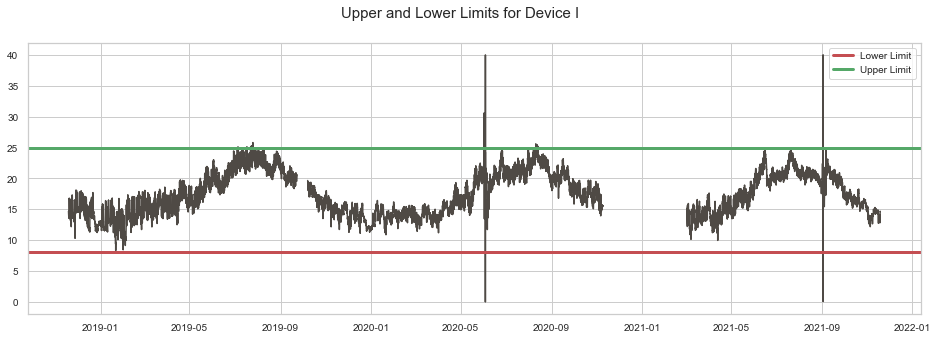

In [81]:
fig, axes = plt.subplots(1,1, figsize=(16,5))
fig.suptitle('Upper and Lower Limits for Device I',fontsize=15)
plt.plot(df_i,color='#4F4A45')
plt.axhline(y=8,color='r',linestyle='-',label='Lower Limit',linewidth=3) #taken from another dataset
plt.axhline(y=25,color='g',linestyle='-',label='Upper Limit',linewidth=3)

plt.legend(prop={'size': 10})

plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10) 

plt.show()

### 4.Seasonal Decomposition

From the plot below we can see the actual dataset, we can the trend of the data, we can see if there's seasonality in the data, and lastly we can see if there's any residual in our data.

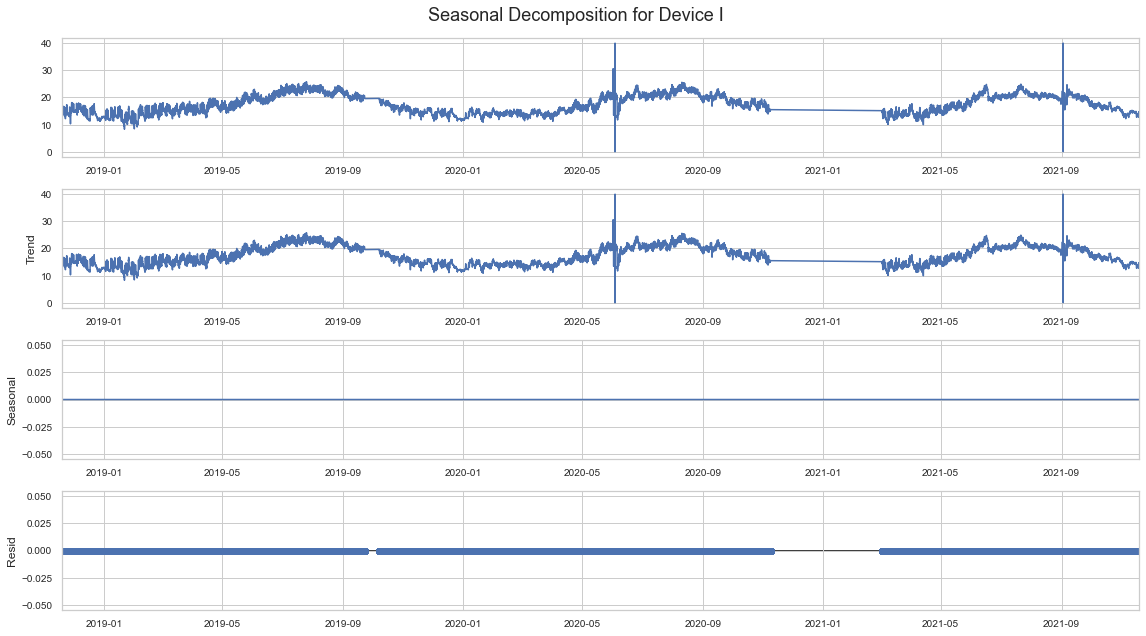

In [82]:
result = seasonal_decompose(df_i.dropna(), model='additive', period=1)
fig = result.plot()
fig.suptitle('Seasonal Decomposition for Device I',fontsize=18)
fig.set_size_inches((16, 9))

plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
# Tight layout to realign things
fig.tight_layout()
plt.show()

# Modeling

In [ ]:
from neuralprophet import NeuralProphet

m = NeuralProphet()
# help(m)

In [ ]:
df_i.T

In [ ]:
df_i["ds"] = df_i.index
df_i = df_i.rename(columns={"Temp": "y"})
df_i.T

In [ ]:
df_i.info()

In [ ]:
import warnings
warnings.filterwarnings('ignore')

m = NeuralProphet(yearly_seasonality=True,
#                   weekly_seasonality=False, 
#                   daily_seasonality=False,
                    epochs=30
                 )

metrics = m.fit(df_i, freq="D")
metrics

In [ ]:
future = m.make_future_dataframe(df_i, periods=365, n_historic_predictions=True)

In [ ]:
forecast = m.predict(future)
fig1 = m.plot(forecast)

In [ ]:
forecast

In [ ]:
fig, ax = plt.subplots()
ax.plot(forecast["ds"],forecast["y"], label="Data")
ax.plot(forecast["ds"],forecast["yhat1"],label="Predicted Data")
ax.legend(loc = 'upper right')
fig.set_size_inches(18.5, 10.5, forward=True)
plt.show()

In [ ]:
fig2 = m.plot_components(forecast)

In [ ]:
## https://neuralprophet.com/html/test_and_crossvalidate.html
## Need to add crossvalidation

In [ ]:
## Using RegEx take the name and format it (Format => "df_A")
pattern = re.compile(r'(?<=\\)(.*?)(?=\.)')
def get_file_names(x):
    files = x
    saved = []
    for file in files:
        for name in re.findall(pattern, file):
            name = name.replace("data","df")
            ## .lower() could be removed it's just that our existing document uses lower case (df_a, df_d)
            name = name.lower()
            saved.append(name)
    return saved

In [ ]:
## Read all the file name and paths and assign them to variable
dataframe_names = get_file_names(all_files)
for index, item in enumerate(dataframe_names):
    globals()['%s' % item] = pd.read_csv(all_files[index])

In [ ]:
print("Available Dataframes:")
print(dataframe_names)

## 2.Converting our dataframes to Time Series

We convert the EventDt column in each avaiable dataframe to DateTime format, after which we set it as an index and then we resmaple the data on a 5 minute frequency.
Addtionally we add a daily, weekly and monthly variant of each dataframe that assist us in the data analysis at a later point in this notebook.

In [ ]:
## Convert all column types to date_time and transform dataframes to time-series
for item in dataframe_names:
    globals()['%s' % item]["EventDt"] = pd.to_datetime(globals()['%s' % item]["EventDt"])
    globals()['%s' % item] = globals()['%s' % item].set_index(globals()['%s' % item]["EventDt"])
    globals()['%s' % item] = globals()['%s' % item].resample(rule="5T").mean()

In [ ]:
df_a.info()

In [ ]:
## Added additional dataframes with resampled data in different formats (daily, weekly, monthly)
for item in dataframe_names:
    globals()['%s_daily' % item] = globals()['%s' % item].resample(rule="D").mean()
    globals()['%s_weekly' % item] = globals()['%s' % item].resample(rule="W").mean()
    globals()['%s_monthly' % item] = globals()['%s' % item].resample(rule="M").mean()

## 3. Visualisation 

Before we went any farther with our research, we wanted to see what each gadget was doing and if it was being read correctly.

In [ ]:
#pic size
sns.set(rc={'figure.figsize':(11.7,8.27)})
#fix the date and maybe zoom in or smt
fig, ax = plt.subplots()
sns.lineplot(x='EventDt', y='Temp', data=df_a, ax=ax) #first dataset
sns.lineplot(x='EventDt', y='Temp', data=df_aa, ax=ax)
sns.lineplot(x='EventDt', y='Temp', data=df_ab, ax=ax)
sns.lineplot(x='EventDt', y='Temp', data=df_ac, ax=ax)
sns.lineplot(x='EventDt', y='Temp', data=df_ad, ax=ax)
sns.lineplot(x='EventDt', y='Temp', data=df_b, ax=ax)
sns.lineplot(x='EventDt', y='Temp', data=df_c, ax=ax)
sns.lineplot(x='EventDt', y='Temp', data=df_d, ax=ax)
sns.lineplot(x='EventDt', y='Temp', data=df_e, ax=ax)
sns.lineplot(x='EventDt', y='Temp', data=df_f, ax=ax)
sns.lineplot(x='EventDt', y='Temp', data=df_g, ax=ax)
sns.lineplot(x='EventDt', y='Temp', data=df_h, ax=ax)
sns.lineplot(x='EventDt', y='Temp', data=df_i, ax=ax)
sns.lineplot(x='EventDt', y='Temp', data=df_j, ax=ax)
sns.lineplot(x='EventDt', y='Temp', data=df_k, ax=ax)
sns.lineplot(x='EventDt', y='Temp', data=df_m, ax=ax)
sns.lineplot(x='EventDt', y='Temp', data=df_n, ax=ax)
sns.lineplot(x='EventDt', y='Temp', data=df_o, ax=ax)
sns.lineplot(x='EventDt', y='Temp', data=df_p, ax=ax)
sns.lineplot(x='EventDt', y='Temp', data=df_q, ax=ax)
sns.lineplot(x='EventDt', y='Temp', data=df_r, ax=ax)
sns.lineplot(x='EventDt', y='Temp', data=df_s, ax=ax)
sns.lineplot(x='EventDt', y='Temp', data=df_t, ax=ax)
sns.lineplot(x='EventDt', y='Temp', data=df_u, ax=ax)
sns.lineplot(x='EventDt', y='Temp', data=df_v, ax=ax)
sns.lineplot(x='EventDt', y='Temp', data=df_w, ax=ax)
sns.lineplot(x='EventDt', y='Temp', data=df_x, ax=ax)
sns.lineplot(x='EventDt', y='Temp', data=df_y, ax=ax)
sns.lineplot(x='EventDt', y='Temp', data=df_z, ax=ax)
plt.title("Linear graph")

As can be observed, the representation of each sensor is a jumble, making it difficult to understand what is going on within. To approach the analysis through this research, we will first compile average temperatures for each device to evaluate where they stand from freezing to warming.

## 4.Average Temperature Dictionary

To cut-down on load times, instead of plotting each dataframe values directly, we create a dictionary with the names and average temperature for each of our devices. Said dictionary is later plotted using SeaBorn barplot.

In [ ]:
average_temps = []
for item in dataframe_names:
#     mean_temp = globals()['%s' % item]["Temp"].mean()
    mean_temp = globals()['%s' % item]["Temp"].quantile(.35)
    average_temps.append(mean_temp)
    
mean_temp_dev_dictionary = {"Device":dataframe_names,"Mean Temperature":average_temps}
mean_temp_dev = pd.DataFrame.from_dict(mean_temp_dev_dictionary)
mean_temp_dev.T

We opted to approach it through visuals from the coldest to the warmest temperature per device to see where each of the standing and categorize it after the average temperature conversion.

In [ ]:
#sns.set_theme(style="whitegrid")
#sns.set_palette(sns.color_pallete("icefire"),as_cmap=True)
sns.set(rc={'figure.figsize':(18,8)})
sns.barplot(x="Device", 
            y="Mean Temperature", 
            data=mean_temp_dev,
            order=mean_temp_dev.sort_values('Mean Temperature').Device,
            palette = "coolwarm").set(title='Categories')
plt.show()

After plotting the dictionary we can easily see the average temperature for each dataframe and compare them to one another. This will help us with categorizing and labeling our dataframes.

## 5.Categorizing Dataframes

After careful consideration and discussion we decided to seperate our dataframes into three distinct categories: Freezer, Fridge, Pantry

In [ ]:
#barchart per category
#check the order
mean_temp_dev.sort_values(by='Mean Temperature',ascending=True).T

In [ ]:
ax=mean_temp_dev.plot.bar(x='Device',
                   y='Mean Temperature',
                   figsize=(11,7))
#label for first visual
ax.bar_label(ax.containers[0], label_type='edge', fontweight='bold',padding=5)
ax.margins(y=0.1)

In [ ]:
#categories
categories = []
customer_types = [
"",
"Food counter",
"",
"Medical facility",
"",
"Pharmacy",
"",
"Food production",
"Food production",
"Food counter",
"Food transport",
"Food production",
"",
"",
"Lab",
"Medical facility",
"",
"",
"Medical facility",
"Food production",
"Food counter",
"Food production",
"",
"",
"Medical facility",
"Pharmacy",
"Pharmacy",
"Lab",
"Pharmacy",
]

for value in mean_temp_dev['Mean Temperature']:
    if value < 0: 
        categories.append('Freezer')
    elif 0 <= value <= 8: 
        categories.append('Refrigerator')
    elif 14 <= value < 22:
        categories.append('Mapping')
    else: 
        categories.append('Unknown')

mean_temp_dev['Categories']  = categories
mean_temp_dev["Customer type"] = customer_types
mean_temp_dev.T

In [ ]:
mean_temp_dev['Categories'] = mean_temp_dev['Categories'].apply(lambda x: x.strip())

# Modify Categories based on Customer Type
for x in range(len(customer_types)):
    if mean_temp_dev['Categories'][x] == "Freezer":
        ## Code for Freezer
        pass
    elif mean_temp_dev['Categories'][x] == "Refrigerator":
        ## Code for fridge
        pass
    elif mean_temp_dev['Categories'][x] == "Mapping":
        ## Code for Mapping
        if mean_temp_dev['Customer type'][x] == "Medical facility":
            mean_temp_dev['Categories'][x] = "Incubator"
        elif mean_temp_dev['Customer type'][x] == "Food production":
            if mean_temp_dev['Mean Temperature'][x] > 17:
                mean_temp_dev['Categories'][x] = "Production area"
            else:
                mean_temp_dev['Categories'][x] = "Storage"
mean_temp_dev

In [ ]:
#barchart per group
sns.barplot(data=mean_temp_dev,
                x="Categories",
                y="Mean Temperature",
                palette = "coolwarm",
                ci=None,
                order=["Freezer", "Refrigerator","Mapping",'Unknown','Incubator',"Production area","Storage"])
plt.title('Categories by Mean Temperature')
plt.xticks(rotation=45)
plt.show()

As can be seen, each gadget was assigned to one of three groups:
- ``Freezer``: devices with temperature lower than 0.
- ``Refrigerator``: devices with temperature higher or equal than 0, but lower or equal than 8.
- ``Mapping``: devices with temperature higher or equal than 14, but lower than 22.
- ``Unknown``: devices with temperature outside the temperature range and we do not know for what it's being use.
- ``Incubator``: devices with the mapping temperature but use in the medical facility.
- ``Production Area``: devices with temperature higher than 17, but lower than 22 and use in food production.
- ``Storage``: devices with temperature higher or equal than 14, but lower than 17 and use in food production.

Because the data does not contain any labeling, such categorization is an obvious technique taken by group members through the usage of external resources.

Following the categorization of the devices, we want to observe each device's pattern through a line plot, which will allow us to approach any potential anomalies and subsequently approach the selection of view devices to make the research more comfortable.

In [ ]:
#barchart per customer type
#size
fig=plt.figure(figsize=(11,7))

#categorical distribution 
distribution = mean_temp_dev['Customer type'].value_counts()

#visual
plot = sns.barplot(distribution.values,
                   distribution.index,
                   palette = "icefire")
                   #order=["Unknown", "Food production","Medical facility",'Pharmacy','Food counter','Lab','Food transport'])

#additionals
plt.title('Frequency Distribution of Customer Types')
plt.ylabel('Type',fontweight='bold',labelpad=20)
plt.xlabel('Number of Occurances',fontweight='bold',labelpad=20)
plt.show()


# Visuallization By Category

Here we plot every dataframe divided based on category from which we will pick the most apropriate dataset to train our model on. In order for dataframe to be deemed apropriate for further analysis it needs to fufill the following conditions:
- Data Consistency
- None or very little missing values
- Upper and lower alarm threshold (Optional)

## Freezer Category

In [ ]:
## AA, E, H, K, Y
# Height Margin
# plt.subplots_adjust(hspace=0.5)
fig, axes = plt.subplots(3,2, figsize=(18,18))
#fig.suptitle('Fridge Category')
axes[0,0].plot(df_aa_daily["Temp"],color='blue')
axes[0,1].plot(df_e_daily["Temp"],color='blue')
axes[1,0].plot(df_h_daily["Temp"],color='blue')
axes[1,1].plot(df_k_daily["Temp"],color='blue')
axes[2,0].plot(df_y_daily["Temp"],color='blue')

axes[0,0].set_title('Device: AA')
axes[0,1].set_title('Device: E')
axes[1,0].set_title('Device: H')
axes[1,1].set_title('Device: K')
axes[2,0].set_title('Device: Y')

plt.show()

As can be seen, there are 5 devices in the freezer category, all of which detect a small number of anomalies and appear to be consistent in their patterns; however, with so many devices, it will be difficult to approach an analysis for all of them; therefore, to limit our research, we will cut out E and Y devices due to their unprogized prattens that could complicate the modeling, and we will leave them out.

## Refrigerator Category

In [ ]:
## B, G, M, P, R, S, V, W, X, Z
# Height Margin
# plt.subplots_adjust(hspace=0.5)
fig, axes = plt.subplots(5,2, figsize=(18,30))
# fig.suptitle('Fridge Category')
axes[0,0].plot(df_b_daily["Temp"],color='orange')
axes[0,1].plot(df_g_daily["Temp"],color='orange')
axes[1,0].plot(df_m_daily["Temp"],color='orange')
axes[1,1].plot(df_p_daily["Temp"],color='orange')
axes[2,0].plot(df_r_daily["Temp"],color='orange')
axes[2,1].plot(df_s_daily["Temp"],color='orange')
axes[3,0].plot(df_v_daily["Temp"],color='orange')
axes[3,1].plot(df_w_daily["Temp"],color='orange')
axes[4,0].plot(df_x_daily["Temp"],color='orange')
axes[4,1].plot(df_z_daily["Temp"],color='orange')
axes[0,0].set_title('Device: B')
axes[0,1].set_title('Device: G')
axes[1,0].set_title('Device: M')
axes[1,1].set_title('Device: P')
axes[2,0].set_title('Device: R')
axes[2,1].set_title('Device: S')
axes[3,0].set_title('Device: V')
axes[3,1].set_title('Device: W')
axes[4,0].set_title('Device: X')
axes[4,1].set_title('Device: Z')

plt.show()

In comparison to the freezer, the fridge approached more devices on its scale and thus more possible dor analysis, but it also stayed above due to a complication of the amount provided, which could slow down the research and modeling. For future steps, we would like to stick with device B, S, and G because of their lack of anomalies and pattern consistency.

## Mapping Category

In [ ]:
## A, AB, AD, C, F, I, J, N, O, U

fig, axes = plt.subplots(5,2, figsize=(18,30))
axes[0,0].plot(df_a_daily["Temp"],color='green')
axes[0,1].plot(df_ab_daily["Temp"],color='green')
axes[1,0].plot(df_ad_daily["Temp"],color='green')
axes[1,1].plot(df_c_daily["Temp"],color='green')
axes[2,0].plot(df_f_daily["Temp"],color='green')
axes[2,1].plot(df_i_daily["Temp"],color='green')
axes[3,0].plot(df_j_daily["Temp"],color='green')
axes[3,1].plot(df_n_daily["Temp"],color='green')
axes[4,0].plot(df_o_daily["Temp"],color='green')
axes[4,1].plot(df_u_daily["Temp"],color='green')
axes[0,0].set_title('Device: A')
axes[0,1].set_title('Device: AB')
axes[1,0].set_title('Device: AD')
axes[1,1].set_title('Device: C')
axes[2,0].set_title('Device: F')
axes[2,1].set_title('Device: I')
axes[3,0].set_title('Device: J')
axes[3,1].set_title('Device: N')
axes[4,0].set_title('Device: O')
axes[4,1].set_title('Device: U')
plt.show()

When it came to the pantry, it can be seen that the majority of the devices ended up in this group, which could be due to the scale range that we provided, but within a follow-up for the freezer and fridge, this part allowed us to see the pattern and provide additional limitations so that we could continue with our analysis phase.

## Extras 

In [ ]:

fig, axes = plt.subplots(3,1, figsize=(18,30))
axes[0].plot(df_ac_daily["Temp"],color='grey')
axes[1].plot(df_q_daily["Temp"],color='maroon')
axes[2].plot(df_d_daily["Temp"],color='plum')

axes[0].set_title('Device: AC - Incubator', fontsize=25)
axes[1].set_title('Device: Q - Production Area', fontsize=25)
axes[2].set_title('Device: D - Storage', fontsize=25)

plt.show()

# Further Analysis

After manually picking three datasets from each category we are ready to explore them and pick one for each category

## Freezers

In [ ]:
fig, axes = plt.subplots(1,3, figsize=(16,7))
fig.suptitle('Freezers')
sns.boxplot(ax=axes[0],y="Temp",data=df_k_daily,color='dodgerblue')
sns.boxplot(ax=axes[1],y="Temp",data=df_aa_daily,color='dodgerblue')
sns.boxplot(ax=axes[2],y="Temp",data=df_h_daily,color='dodgerblue')
axes[0].set_title('Device: K')
axes[1].set_title('Device: AA')
axes[2].set_title('Device: H')
plt.show()

Based on the results, we will choose **device K** since it has less outliers than devices AA and H, which can be easily spotted within a large number of them, slowing down our research and harming further modeling. As a consequence, we will continue to use device K for future study.

## Refrigerators

In [ ]:
fig, axes = plt.subplots(1,3, figsize=(16,7))
fig.suptitle('Fridges')
sns.boxplot(ax=axes[0],y="Temp",data=df_b_daily,color='orange')
sns.boxplot(ax=axes[1],y="Temp",data=df_s_daily,color='orange')
sns.boxplot(ax=axes[2],y="Temp",data=df_g_daily,color='orange')
axes[0].set_title('Device: B')
axes[1].set_title('Device: S')
axes[2].set_title('Device: G')
plt.show()

In the case of the refrigerator, it is clear that **device B** will be eliminated due to its outliers, and that device G will be eliminated due to the outliers accumulating in the scale from 5 to 4 degrees. As a result, we will stick with device S, even though it contributed to a few of the outliers, because it is more useful for further research and modeling than the other two.

## Mappings

In [ ]:
fig, axes = plt.subplots(1,3, figsize=(16,7))
fig.suptitle('Pantries')
sns.boxplot(ax=axes[0],y="Temp",data=df_i_daily,color='darkred')
sns.boxplot(ax=axes[1],y="Temp",data=df_o_daily,color='darkred')
sns.boxplot(ax=axes[2],y="Temp",data=df_ab_daily,color='darkred')
axes[0].set_title('Device: I')
axes[1].set_title('Device: O')
axes[2].set_title('Device: AB')
plt.show()

Following the same pattern as before, we will stick to **device I** as our main research recognition for the pantry category, based on the outliers in device D and AB. This is done with the idea that trained models with outliers will increase error variance and reduce the power of statistical tests for our modeling, so we approached to be sticking with device I.

## Extras

In [ ]:
fig, axes = plt.subplots(1,3, figsize=(16,7))
fig.suptitle('Pantries')
sns.boxplot(ax=axes[0],y="Temp",data=df_ac_daily,color='darkred')
sns.boxplot(ax=axes[1],y="Temp",data=df_q_daily,color='darkred')
sns.boxplot(ax=axes[2],y="Temp",data=df_d_daily,color='darkred')

axes[0].set_title('Device: AC')
axes[1].set_title('Device: Q')
axes[2].set_title('Device: D')

plt.show()

## Conclusion

Based on the analysis that we've done, we decide to use **Device K** for the freezer, **Device S** for the Refrigerator, **Device I** for the mapping, and lastly **Device D** for extra.

# The details from each device that have been chosen 
Here we're going to dig more from the device that we chose.

## Freezer - Device K 

### The Outliers and Overviews

From the plot below, we can see that on the first plot is showing the outliers from device K in each month, the second plot is showing the overview for the entire week, and lastly the third plot is showing us the overview for the whole day (24 Hours).

In [ ]:
df_k_copy = df_k_daily.copy()
df_k_copy["Month"] = df_k_copy.index.to_period('M')

df_k_zoom = df_k.loc["2019-01-01 00:00:00":"2019-01-02 00:00:00"]

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(16,14))
plt.subplots_adjust(hspace=0.4)
sns.boxplot(ax=axes[0],x="Month",y="Temp",data=df_k_copy)
fig.suptitle('Device K',fontsize="xx-large")
axes[0].set_xticklabels(axes[0].get_xticklabels(),rotation = 45)
axes[1].plot(df_k_weekly,color='dodgerblue' )
axes[2].plot(df_k_zoom,color='orange')
axes[0].set_title('Showing the Outliers', fontsize="x-large")
axes[1].set_title('Weekly Overview', fontsize="x-large")
axes[2].set_title('Hourly changes (24H overview)', fontsize="x-large")
plt.show()

### The Null Values in the Dataset of Device K
Here we can see that Device K has 59 null values out of 315.648 values.

In [ ]:
df_k.info()

In [ ]:
df_k.isna().sum()

### The Upper Limit and Lower Limit of Device K
As we can see from the plot below that the upper limit from Device K is -20 degrees and the lower limit is below -20 degrees.

In [ ]:
fig, axes = plt.subplots(1,1, figsize=(40,30))
plt.plot(df_k)
plt.axhline(y=-20,color='r',linestyle='-',label='Upper Limit',linewidth=5)

plt.legend(prop={'size': 40})

##plt.rc('xtick', labelsize=30)
#plt.rc('ytick', labelsize=30) 

plt.show()

### Seasonal Decomposition of Device K
From the plot below we can see the actual dataset, we can the trend of the data, we can see if there's seasonality in the data, and lastly we can see if there's any residual in our data.

In [ ]:


result = seasonal_decompose(df_k.dropna(), model='additive', period=1)
fig = result.plot()
fig.set_size_inches((16, 9))

plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
# Tight layout to realign things
fig.tight_layout()
plt.show()

## Mapping - Device I
### The Outliers and Overviews
From the plot below, we can see that on the first plot is showing the outliers from device I in each month, the second plot is showing the overview for the entire week, and lastly the third plot is showing us the overview for the whole day (24 Hours).

In [ ]:
df_i_copy = df_i_daily.copy()
df_i_copy["Month"] = df_i_copy.index.to_period('M')

df_i_zoom = df_i.loc["2019-01-01 00:00:00":"2019-01-02 00:00:00"]

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(16,14))
plt.subplots_adjust(hspace=0.4)
sns.boxplot(ax=axes[0],x="Month",y="Temp",data=df_i_copy)
fig.suptitle('Device I',fontsize="xx-large")
axes[0].set_xticklabels(axes[0].get_xticklabels(),rotation = 45)
axes[1].plot(df_i_weekly,color='dodgerblue' )
axes[2].plot(df_i_zoom,color='orange')
axes[0].set_title('Showing the Outliers', fontsize="x-large")
axes[1].set_title('Weekly Overview', fontsize="x-large")
axes[2].set_title('Hourly changes (24H overview)', fontsize="x-large")

plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

plt.show()

### The Null Values in the Dataset of Device I
Here we can see that Device K has 59 null values out of 315.648 values.

In [ ]:
df_i.info()

In [ ]:
df_i.isna().sum()

In [ ]:
#df_i.rename(columns = {'y':'Temp'}, inplace = True)

In [ ]:
sns.heatmap(df_i.isnull(), cbar=False)

### The Upper Limit and Lower Limit of Device I
As we can see from the plot below that the upper limit from Device I is 25 degrees and the lower limit from Device I is 8 degrees.

In [ ]:
fig, axes = plt.subplots(1,1, figsize=(40,30))
plt.plot(df_i)
plt.axhline(y=8,color='r',linestyle='-',label='Lower Limit',linewidth=5)
plt.axhline(y=25,color='g',linestyle='-',label='Upper Limit',linewidth=5)

plt.legend(prop={'size': 40})

plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20) 

plt.show()

### Seasonal Decomposition of Device I
From the plot below we can see the actual dataset, we can the trend of the data, we can see if there's seasonality in the data, and lastly we can see if there's any residual in our data.

In [ ]:
result = seasonal_decompose(df_i.dropna(), model='additive', period=1)
fig = result.plot()
fig.set_size_inches((16, 9))

plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
# Tight layout to realign things
fig.tight_layout()
plt.show()

# Modeling

## Device I NeuralProphet prediction

In [ ]:
m = NeuralProphet()
# help(m)

In [ ]:
df_i_copy = df_i
df_i_copy

In [ ]:
def ChangeDatasetForNeural(data):
    data["ds"] = data.index
    data = data.rename(columns = {'Temp':'y'}, inplace = True)
    data

In [ ]:
ChangeDatasetForNeural(df_i_copy)

In [ ]:
df_i_copy.info()

In [ ]:
warnings.filterwarnings('ignore')

m = NeuralProphet(yearly_seasonality=True,
#                   weekly_seasonality=False, 
#                   daily_seasonality=False,
                    epochs=30
                 )

metrics = m.fit(df_i_copy, freq="D")
metrics

In [ ]:
future = m.make_future_dataframe(df_i_copy, periods=365, n_historic_predictions=True)

In [ ]:
forecast = m.predict(future)
fig1 = m.plot(forecast)

In [ ]:
forecast

In [ ]:
fig, ax = plt.subplots()
ax.plot(forecast["ds"],forecast["y"], label="Data")
ax.plot(forecast["ds"],forecast["yhat1"],label="Predicted Data")
ax.legend(loc = 'upper right')
fig.set_size_inches(18.5, 10.5, forward=True)
plt.show()

In [ ]:
fig2 = m.plot_components(forecast)

In [ ]:
## https://neuralprophet.com/html/test_and_crossvalidate.html
## Need to add crossvalidation

## Device K Predictions

In [ ]:
df_k_daily

In [ ]:
plt.rc('figure',figsize=(14,8))
plt.rc('font',size=15)

result = seasonal_decompose(df_k_daily,model='additive')
fig = result.plot()

### Seasonal Arima model. Daily value prediction

In [ ]:
model = sm.tsa.statespace.SARIMAX(df_k_daily['Temp'], 
                order=(1,1,1), 
                seasonal_order=(1,1,0,12))

sarima = model.fit()

predictions = sarima.predict()

In [ ]:
plt.figure(figsize=(16,4))
plt.plot(df_k_daily, label="Actual")
plt.plot(predictions, label="Predicted")
plt.title('Comparison of predicted and actual data', fontsize=20)
plt.ylabel('Temperature in celsius', fontsize=16)
plt.legend()

In [ ]:
forecast = sarima.forecast(100)

ax = df_k_daily.plot(label='observed', figsize=(20, 15))
forecast.plot(ax=ax, label='Forecast')

ax.set_xlabel('Date')
ax.set_ylabel('Temperature in celsius')

plt.legend()
plt.show()

### Seasonal Auto-Arima model. Daily value prediction

In [ ]:

# Seasonal - fit stepwise auto-ARIMA
smodel = pm.auto_arima(df_k_daily, start_p=1, start_q=1,
                         test='adf',
                         max_p=1, max_q=1, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)


In [ ]:
data = df_k_daily
# Forecast
n_periods = 12
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(data.index[-1], periods = n_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(data)
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMA - Forecast of temperature change")
plt.show()

### Seasonal Auto-Arima model. Hourly prediction

#### NOTE: For the love of sweet jesus H. christ please do NOT re run this piece of crap 

In [ ]:
df_k_hourly = df_k.resample('H').mean()
df_k_hourly

In [ ]:
# Seasonal - fit stepwise auto-ARIMA
smodel = pm.auto_arima(df_k_hourly, start_p=1, start_q=1,
                         test='adf',
                         max_p=1, max_q=1, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)


In [ ]:
# Forecast
n_periods = 12
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(df_k_hourly.index[-1], periods = n_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(df_k_hourly)
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMA - Forecast of temperature change")
plt.show()

### NeuralProphet model. Daily prediction

In [ ]:
df_k_daily_copy = df_k_daily

In [ ]:
ChangeDatasetForNeural(df_k_daily_copy)

In [ ]:
df_k_daily_copy = df_k_daily_copy.rename(columns={"Temp": "y"})
df_k_daily_copy

In [ ]:
warnings.filterwarnings('ignore')

model = NeuralProphet(yearly_seasonality=True,
                    epochs=30
                 )

result = model.fit(df_k_daily_copy, freq="D")
result

In [ ]:
future = model.make_future_dataframe(df_k_daily_copy, periods=365, n_historic_predictions=True)

In [ ]:
forecast = model.predict(future)
fig1 = model.plot(forecast)

In [ ]:
fig, ax = plt.subplots()
ax.plot(forecast["ds"],forecast["y"], label="Data")
ax.plot(forecast["ds"],forecast["yhat1"],label="Predicted Data")
ax.legend(loc = 'upper right')
fig.set_size_inches(18.5, 10.5, forward=True)
plt.show()

### NeuralProphet mode. All data prediction

In [ ]:
df_k_copy = df_k.copy()
df_k_copy

In [ ]:
ChangeDatasetForNeural(df_k_copy)
df_k_copy = df_k_copy.rename(columns={"Temp": "y"})
df_k_copy

In [ ]:
warnings.filterwarnings('ignore')

model = NeuralProphet(yearly_seasonality=True,
                    epochs=30
                 )

result = model.fit(df_k_copy, freq="D")
result

In [ ]:
future = model.make_future_dataframe(df_k_copy, periods=365, n_historic_predictions=True)


In [ ]:
forecast = model.predict(future)
fig1 = model.plot(forecast)

In [ ]:
fig, ax = plt.subplots()
ax.plot(forecast["ds"],forecast["y"], label="Data")
ax.plot(forecast["ds"],forecast["yhat1"],label="Predicted Data")
ax.legend(loc = 'upper right')
fig.set_size_inches(18.5, 10.5, forward=True)
plt.show()

## Device S predictions

In [ ]:
df_s_daily

In [ ]:
plt.rc('figure',figsize=(14,8))
plt.rc('font',size=15)

result = seasonal_decompose(df_s_daily,model='additive')
fig = result.plot()

### Seasonal Arima model. Daily value prediction

In [ ]:
model = sm.tsa.statespace.SARIMAX(df_s_daily, 
                order=(1,1,1), 
                seasonal_order=(1,1,0,12))

sarima = model.fit()

predictions = sarima.predict()

In [ ]:
forecast = sarima.forecast(100)

ax = df_s_daily.plot(label='observed', figsize=(20, 15))
forecast.plot(ax=ax, label='Forecast')

ax.set_xlabel('Date')
ax.set_ylabel('Temperature in celsius')

plt.legend()
plt.show()

### Seasonal Auto-Arima model. Daily value prediction

In [ ]:

# Seasonal - fit stepwise auto-ARIMA
smodel = pm.auto_arima(df_s_daily, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)


In [ ]:
# Forecast
n_periods = 24
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(df_s_daily.index[-1], periods = n_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(df_s_daily)
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMA - Forecast of temperature change")
plt.show()

### NeuralProphet model. Daily Prediction

In [ ]:
df_s_daily_copy = df_s_daily

In [ ]:
ChangeDatasetForNeural(df_s_daily_copy)

In [ ]:
df_s_daily_copy = df_s_daily_copy.rename(columns={"Temp": "y"})
df_s_daily_copy

In [ ]:
warnings.filterwarnings('ignore')

model = NeuralProphet(yearly_seasonality=True,
                    epochs=100
                 )

result = model.fit(df_s_daily_copy, freq="D")
result

In [ ]:
future = model.make_future_dataframe(df_s_daily_copy, periods=365, n_historic_predictions=True)

In [ ]:
forecast = model.predict(future)
fig1 = model.plot(forecast)

In [ ]:
fig, ax = plt.subplots()
ax.plot(forecast["ds"],forecast["y"], label="Data")
ax.plot(forecast["ds"],forecast["yhat1"],label="Predicted Data")
ax.legend(loc = 'upper right')
fig.set_size_inches(18.5, 10.5, forward=True)
plt.show()

## Device D predictions

### Seasonal Auto-Arima model. Daily value prediction

In [ ]:
df_d_daily

In [ ]:
df_d_daily.info()

In [ ]:
df_d_daily_copy = df_d_daily.copy()
df_d_daily_copy = df_d_daily_copy.dropna()
df_d_daily_copy.info()

In [ ]:
# Seasonal - fit stepwise auto-ARIMA
smodel = pm.auto_arima(df_d_daily_copy, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)


In [ ]:
# Forecast
n_periods = 24
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(df_d_daily_copy.index[-1], periods = n_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(df_d_daily_copy)
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMA - Forecast of temperature change")
plt.show()

### NeuralProphet model. Daily prediction

In [ ]:
df_d_daily_copy = df_d_daily

In [ ]:
ChangeDatasetForNeural(df_d_daily_copy)

In [ ]:
df_d_daily_copy = df_d_daily_copy.rename(columns={"Temp": "y"})
df_d_daily_copy = df_d_daily_copy.dropna()

In [ ]:
df_d_daily_copy.info()

In [ ]:
warnings.filterwarnings('ignore')

model = NeuralProphet(yearly_seasonality=True,
                    epochs=30
                 )

result = model.fit(df_d_daily_copy, freq="D")
result

In [ ]:
future = model.make_future_dataframe(df_d_daily_copy, periods=365, n_historic_predictions=True)

In [ ]:
forecast = model.predict(future)
fig1 = model.plot(forecast)

In [ ]:
fig, ax = plt.subplots()
ax.plot(forecast["ds"],forecast["y"], label="Data")
ax.plot(forecast["ds"],forecast["yhat1"],label="Predicted Data")
ax.legend(loc = 'upper right')
fig.set_size_inches(18.5, 10.5, forward=True)
plt.show()

### NeuralProphet mode. All data prediction

In [ ]:
df_d_copy = df_d.copy()
df_d_copy = df_d_copy.dropna()
df_d_copy

In [ ]:
ChangeDatasetForNeural(df_d_copy)
df_d_copy = df_d_copy.rename(columns={"Temp": "y"})
df_d_copy

In [ ]:
warnings.filterwarnings('ignore')

model = NeuralProphet(yearly_seasonality=True,
                    epochs=30
                 )

result = model.fit(df_d_copy, freq="D")
result

In [ ]:
future = model.make_future_dataframe(df_d_copy, periods=365, n_historic_predictions=True)


In [ ]:
forecast = model.predict(future)
fig1 = model.plot(forecast)

In [ ]:
fig, ax = plt.subplots()
ax.plot(forecast["ds"],forecast["y"], label="Data")
ax.plot(forecast["ds"],forecast["yhat1"],label="Predicted Data")
ax.legend(loc = 'upper right')
fig.set_size_inches(18.5, 10.5, forward=True)
plt.show()